In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#eda
#check distribution
#sheet 4 why different?
#change test rank sum test
#draw graph
#compute logistic
#maybe combine all 49*168 data together

In [4]:
#data merging
sheet_num = [0,1,2,3,5]
sheet_rows = [13,5,6,12,9,4]
start_row = [1,14,19,25,37,46]
each_mut = 168
merge = pd.DataFrame()
for sheet in sheet_num:
    data_slice = []
    #讀資料
    data = pd.read_excel ('/Users/liu/Desktop/合作社專案三_lungcancer/data(new)/LoD+LoB(new heater) data整理-03102020.xlsx',sheet_name=sheet)
    rows = sheet_rows[sheet]
    start = start_row[sheet]
    #整理資料
    data = data.drop('Unnamed: 0',axis=1)
    data = data.dropna(axis=1,how='all')
    for i in range(rows):
        data_slice.append(data.iloc[start+i,:].dropna())
        x = pd.DataFrame(np.array(data_slice,dtype=object))
    merge = pd.concat([merge,x],axis=0)

In [5]:
#data merging for sheet4
sheet4 = pd.read_csv('/Users/liu/Desktop/合作社專案三_lungcancer/data(new)/LoD_EGFR-2-03102020.csv')
rows = sheet_rows[4]
start = start_row[4]
mergefor4 = pd.DataFrame()
for i in range(rows):
        mergefor4 = pd.concat([mergefor4,pd.DataFrame(sheet4.iloc[start+i,:].dropna()).reset_index(drop=True).transpose()],axis=0)
merge = pd.concat([merge.iloc[0:36,:],mergefor4,merge.iloc[36:40,:]],axis=0).dropna(axis=1).reset_index(drop=True)

In [6]:
#change their column name
column_name = {}
for i in range(4):
    for j in range(21):
        column_name.update({j+1+i*21: 'b1_'+'l'+str(4-i)+'r'+str(j)})
for i in range(4):
    for j in range(21):
        column_name.update({j+1+i*21+84: 'b2_'+'l'+str(4-i)+'r'+str(j)})
len(column_name)
merge = merge.rename(columns=column_name)
merge.iloc[:,1:169] = merge.iloc[:,1:169].astype('float')

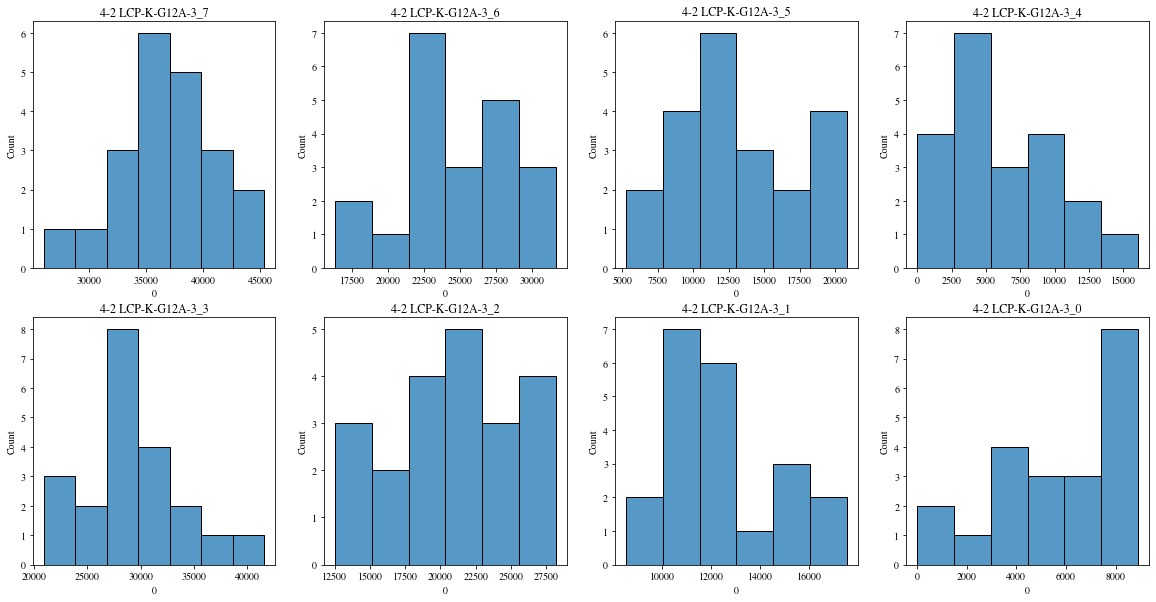

In [54]:
#demo the distribution of one mutation
cut = (np.linspace(0,168,9)+1).astype(int)
fig, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(len(cut)-1):
    if i < 4:
        sns.histplot(ax=axs[0,i],x=merge.iloc[0,cut[i]:cut[i+1]]).set_title(label=merge.iloc[0,0]+'_'+str(7-i))
    else:
        sns.histplot(ax=axs[1,i-4],x=merge.iloc[0,cut[i]:cut[i+1]]).set_title(label=merge.iloc[0,0]+'_'+str(7-i))

In [7]:
#drawing all
while true:
    pass
    for index in range(25):
    fig, axs = plt.subplots(2,4,figsize=(20,10))
    for i in range(len(cut)-1):
        if i < 4:
            sns.histplot(ax=axs[0,i],x=merge.iloc[index,cut[i]:cut[i+1]]).set_title(label=merge.iloc[index,0]+'_'+str(i))
        else:
            sns.histplot(ax=axs[1,i-4],x=merge.iloc[index,cut[i]:cut[i+1]]).set_title(label=merge.iloc[index,0]+'_'+str(i))

IndentationError: expected an indented block (<ipython-input-7-644b08e9bb0c>, line 5)

In [ ]:
#drawing all part2
while true:
    pass
    for index in range(25,49):
    fig, axs = plt.subplots(2,4,figsize=(20,10))
    for i in range(len(cut)-1):
        if i < 4:
            sns.histplot(ax=axs[0,i],x=merge.iloc[index,cut[i]:cut[i+1]]).set_title(label=merge.iloc[index,0]+'_'+str(i))
        else:

            sns.histplot(ax=axs[1,i-4],x=merge.iloc[index,cut[i]:cut[i+1]]).set_title(label=merge.iloc[index,0]+'_'+str(i))

In [7]:
#rank sum test for 2 batch of products
from scipy.stats import ranksums
count = 0
alpha = 0.01
for i in range(merge.shape[0]):
    batch1 = merge.iloc[i,1:85]
    batch2 = merge.iloc[i,85:169]
    stats,pvalue = ranksums(batch1,batch2)
    print('The pvalue of index {}, {} is: {}'.format(i,merge.iloc[i,0],pvalue))
    if pvalue < alpha:
        print('***Significant***')
        count += 1
print('There are {} tests are significant'.format(count))
#alpha = 0.05 , 6 significant tests
#alpha = 0.01 , 4 significant tests

The pvalue of index 0, 4-2 LCP-K-G12A-3 is: 0.11307066234489242
The pvalue of index 1, 86-2 K-G12D-dTCAP-1 is: 0.18589191409326622
The pvalue of index 2, 87-2 K-G12V-dTCAP-1 is: 0.7923215941178617
The pvalue of index 3, 4-7 LCP-K-G12C-3 is: 0.7704033106390019
The pvalue of index 4, 87-4 K-G12R-dTCAP-1 is: 0.00021793712492953872
***Significant***
The pvalue of index 5, 91-1 K-G12S-dTCAP-2 is: 3.7684681899659275e-09
***Significant***
The pvalue of index 6, 71-7 LCP-K-G13D-8 is: 5.3727824180522484e-11
***Significant***
The pvalue of index 7, 87-8 K-G13C-dTCAP-1 is: 0.2508216175547877
The pvalue of index 8, 71-10 LCP-K-Q61HC-5 is: 0.5424761781172887
The pvalue of index 9, 88-3 K-Q61HT-dTCAP-1 is: 0.5962738652849155
The pvalue of index 10, 7-13 LCP-K-Q61L-11 is: 0.5995775778581574
The pvalue of index 11, 16-3 LCP-K-Q61K-7 is: 0.42405383548305187
The pvalue of index 12, 7-11 LCP-K-Q61R-12 is: 0.6696210204023019
The pvalue of index 13, 18-2 N-Q61K-dTCAP-3 is: 0.9595198986842853
The pvalue of 

In [41]:
#try to see whether the discrepency vary from different desity of mutation
#store a dataframe 49*4 of True/False
from scipy.stats import ranksums
count_2 = pd.DataFrame(index=range(49),columns=range(4))
alpha = 0.05
for i in range(merge.shape[0]):
    for j in range(4):
        start_1 = j*21+1
        start_2 = j*21+85
        batch1 = merge.iloc[i,start_1:start_1+21]
        batch2 = merge.iloc[i,start_2:start_2+21] 
        stats,pvalue = ranksums(batch1,batch2)
        print('The pvalue of index {}, {} is: {}'.format(i,merge.iloc[i,j],pvalue))
        if pvalue < alpha:
            print('***Significant***')
            count_2.iloc[i,j] = True
        else:
            count_2.iloc[i,j] = False

The pvalue of index 0, 4-2 LCP-K-G12A-3 is: 3.501643573039304e-05
***Significant***
The pvalue of index 0, 33574.0 is: 0.004654498237297785
***Significant***
The pvalue of index 0, 32717.0 is: 0.32039244685219337
The pvalue of index 0, 32236.0 is: 0.9799307399921785
The pvalue of index 1, 86-2 K-G12D-dTCAP-1 is: 0.08040794963418751
The pvalue of index 1, 20470.0 is: 0.8503529931659453
The pvalue of index 1, 14655.0 is: 0.12184443311498698
The pvalue of index 1, 11249.0 is: 0.04829929565780511
***Significant***
The pvalue of index 2, 87-2 K-G12V-dTCAP-1 is: 0.6237540013842007
The pvalue of index 2, 25752.0 is: 0.17835667070868755
The pvalue of index 2, 22992.0 is: 0.7531817523323453
The pvalue of index 2, 26926.0 is: 0.949854615166749
The pvalue of index 3, 4-7 LCP-K-G12C-3 is: 0.03149074264879258
***Significant***
The pvalue of index 3, 29542.0 is: 0.8503529931659453
The pvalue of index 3, 21443.0 is: 0.2130548841465678
The pvalue of index 3, 28966.0 is: 0.38546384145150514
The pvalue 

In [45]:
#observe count_2
column_sum = np.sum(count_2,axis=1)
row_sum = np.sum(count_2,axis=0)

In [53]:
column_sum[column_sum>=3]

4     3.0
5     4.0
6     4.0
23    3.0
39    4.0
40    3.0
42    3.0
dtype: float64

In [28]:
np.array([sum(count_2[0]),sum(count_2[1]),sum(count_2[2]),sum(count_2[3])])

array([20, 20,  8,  8])

In [55]:
#importing control data
control = pd.read_excel ('/Users/liu/Desktop/合作社專案三_lungcancer/data(new)/LoD+LoB(new heater) data整理-03102020.xlsx',sheet_name=6)

In [56]:
#clean the control data
#compare whether the label are the same
control = control.drop(index=[0,1,2]).reset_index(drop=True)
control.iloc[:,0] == merge.iloc[:,0]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
dtype: bool

In [57]:
#check the null value counts
control.iloc[:,1:169] = control.iloc[:,1:169].astype('float')
control.isnull().sum(axis=1)

0      3
1      3
2      3
3      2
4      0
5      2
6      0
7      0
8      0
9      0
10     3
11     3
12     3
13     0
14     1
15     0
16     3
17     0
18     0
19     2
20     4
21     6
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     3
30     0
31     0
32     0
33     0
34     0
35     0
36     2
37     0
38    88
39     0
40     2
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
dtype: int64

In [58]:
#level
level = []
for i in range(168):
    if i < 21 or 84 <= i < 105:
        level.append(4)
    if 21 <= i < 42 or 105 <= i < 126:
        level.append(3)
    if 42 <= i < 63 or 126 <= i < 147:
        level.append(2)
    if 63 <= i < 84 or 147 <= i < 168:
        level.append(1)

In [59]:
#filling the missing data
def fill(row):
    mean = np.mean(row[1:])
    row = row.fillna(mean)
    return row
control = control.apply(fill,axis=1)

In [ ]:
#for each mutation
#draw a plot that have category 0 and 1
#jittering
#color them with different concentration

In [11]:
#testing the code for plotting a mutation point
mutation_c = pd.DataFrame()
mutation_c['response'] = control.iloc[0,1:]
mutation_c['mutation'] = 0
mutation_c['level'] = 0
mutation_m = pd.DataFrame()
mutation_m['response'] = merge.iloc[0,1:]
mutation_m['mutation'] = 1
mutation_m = pd.concat([mutation_m.reset_index(drop=True),pd.DataFrame(level,columns=['level'])],axis=1)
mutation = pd.concat([mutation_c.reset_index(drop=True),mutation_m],axis=0).reset_index(drop=True)
mutation['response'] = mutation['response'].astype('int')

<AxesSubplot:xlabel='response', ylabel='mutation'>

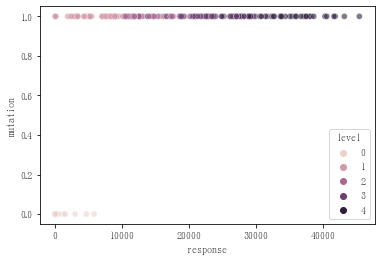

In [12]:
sns.scatterplot(data=mutation,x='response',y='mutation',hue='level',alpha=0.6)

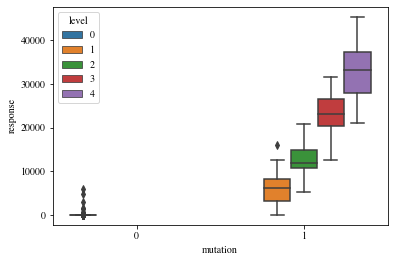

In [16]:
plt.rcParams["font.family"] = "Times"
ax = sns.boxplot(data=mutation, x='mutation', y='response',hue='level')

/Users/liu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


<AxesSubplot:xlabel='response', ylabel='mutation'>

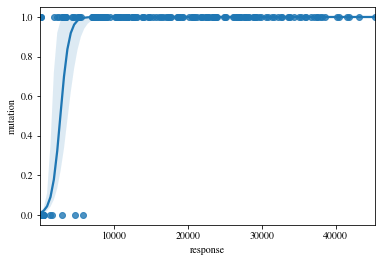

In [17]:
#regplot seems to be slow
sns.regplot(x=mutation['response']+1,y=mutation['mutation'],logistic=True)

In [ ]:
###next steps
#sum up what we've done here
#jitterplot ###can't find efficient ways:P###
#learn to write out the graph
#logistic regression
#data preprocessing
#sample mutation for visualization
#generalize to all mutation
#better way to run for different data?
#discuss the conclusion

In [65]:
#fit the data with sklearn logistic
#and plot the regression line with the scatterplot
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
X = mutation['response'].values.reshape(-1,1)
Y = mutation['mutation'].values.reshape(-1,1)
clf.fit(X,np.ravel(Y.astype(int)))

LogisticRegression()

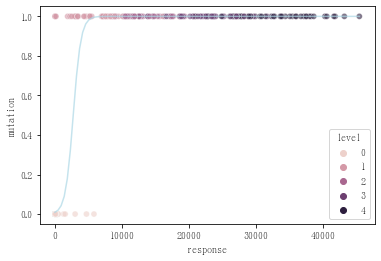

In [15]:
curve = np.linspace(0,max(mutation['response']),100).reshape(-1,1)
plt.plot(curve,clf.predict_proba(curve)[:,1],alpha=0.7,color='lightblue')
sns.scatterplot(data=mutation,x='response',y='mutation',hue='level',alpha=0.6)
plt.show()

In [16]:
###randomly sample 7 mutation points to be visiualized
import random
random.seed(49)
demo_ind = random.sample(range(49),7)

In [17]:
clf = LogisticRegression()
X = mutation['response'].values.reshape(-1,1)
Y = mutation['mutation'].values.reshape(-1,1)
clf.fit(X,np.ravel(Y.astype(int)))
from sklearn.metrics import accuracy_score
accuracy_score(Y,clf.predict(X))

0.987146529562982

In [ ]:
#find the upper and lower bound of the gray area
#set max(natural) as upper bound
#lower bound 1.proba50 2.roc curve tp/p+tn/n 3.accuracy

In [18]:
#return the responsed value corresponding to 50%cutoff
def proba_50(clf):
    cutoff_proba50 = -(clf.intercept_/clf.coef_)
    return cutoff_proba50

plot of mutation: 0 - 4-2 LCP-K-G12A-3


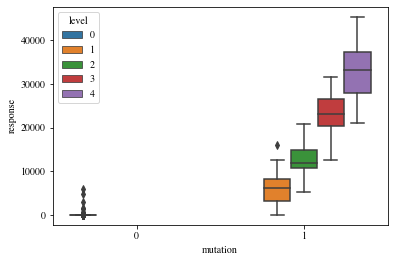

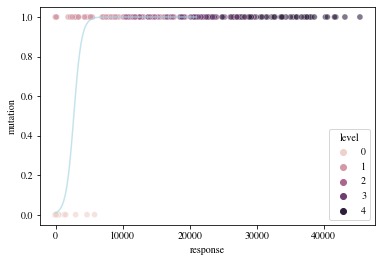

the cutoff point for 0 - 4-2 LCP-K-G12A-3 [[2719.66619167]]
plot of mutation: 1 - 86-2 K-G12D-dTCAP-1


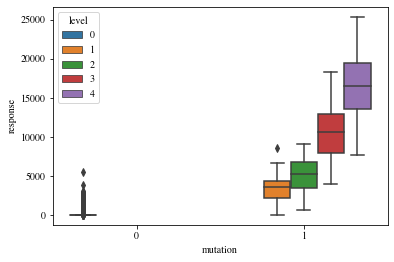

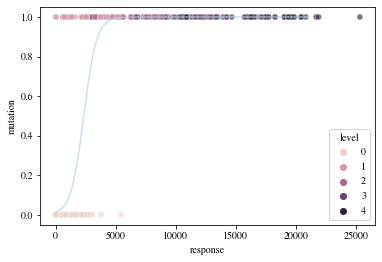

the cutoff point for 1 - 86-2 K-G12D-dTCAP-1 [[2349.4760424]]
plot of mutation: 2 - 87-2 K-G12V-dTCAP-1


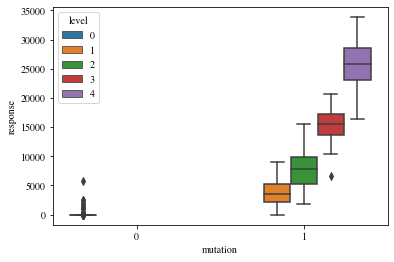

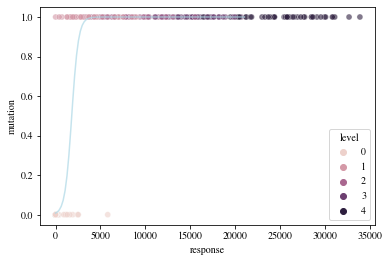

the cutoff point for 2 - 87-2 K-G12V-dTCAP-1 [[1802.26789928]]
plot of mutation: 3 - 4-7 LCP-K-G12C-3


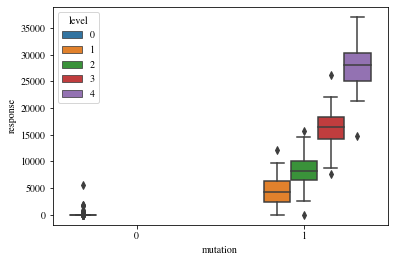

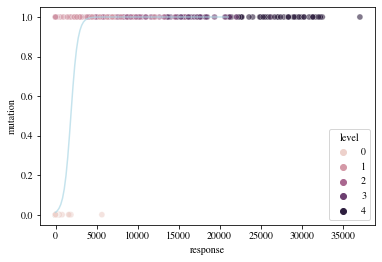

the cutoff point for 3 - 4-7 LCP-K-G12C-3 [[1865.01134817]]
plot of mutation: 4 - 87-4 K-G12R-dTCAP-1


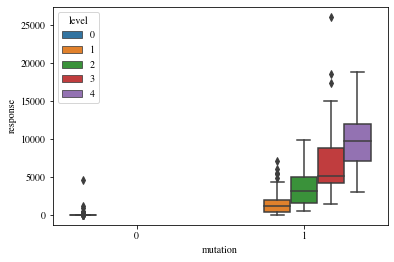

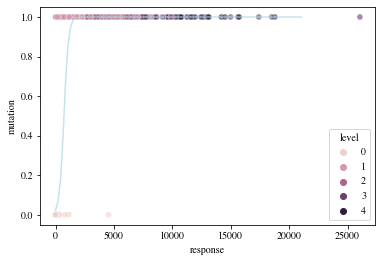

the cutoff point for 4 - 87-4 K-G12R-dTCAP-1 [[721.03236684]]
plot of mutation: 5 - 91-1 K-G12S-dTCAP-2


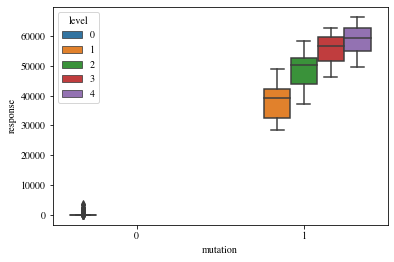

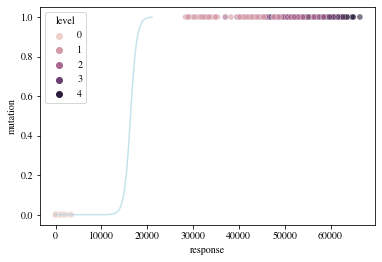

the cutoff point for 5 - 91-1 K-G12S-dTCAP-2 [[16362.3838835]]
plot of mutation: 6 - 71-7 LCP-K-G13D-8


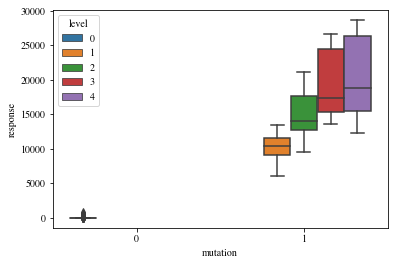

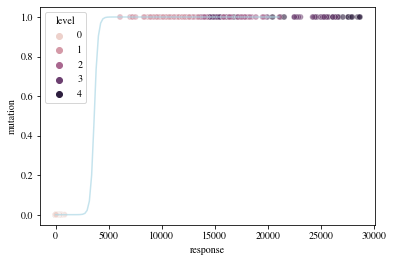

the cutoff point for 6 - 71-7 LCP-K-G13D-8 [[3642.34651571]]
plot of mutation: 7 - 87-8 K-G13C-dTCAP-1


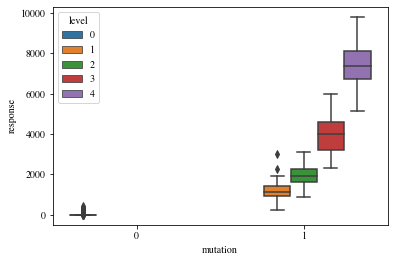

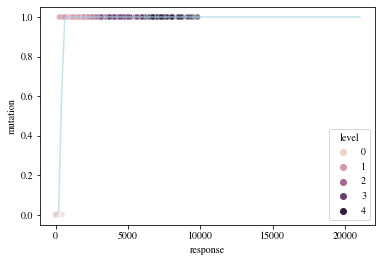

the cutoff point for 7 - 87-8 K-G13C-dTCAP-1 [[403.77370595]]
plot of mutation: 8 - 71-10 LCP-K-Q61HC-5


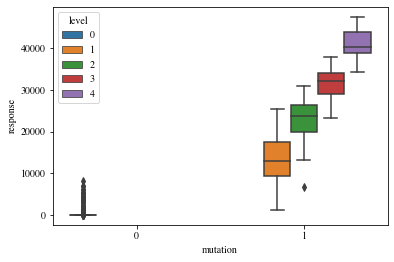

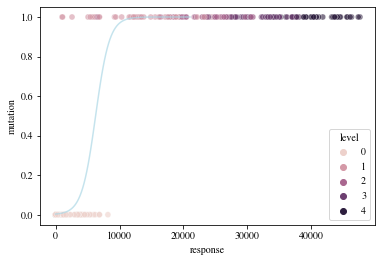

the cutoff point for 8 - 71-10 LCP-K-Q61HC-5 [[6263.88830012]]
plot of mutation: 9 - 88-3 K-Q61HT-dTCAP-1


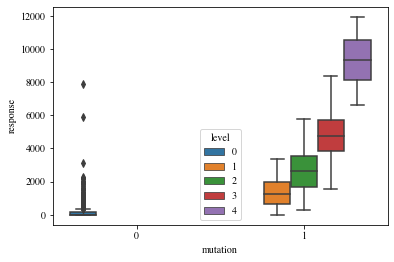

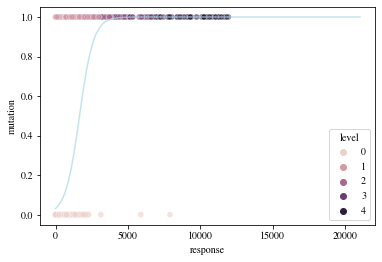

the cutoff point for 9 - 88-3 K-Q61HT-dTCAP-1 [[1656.63385555]]
plot of mutation: 10 - 7-13 LCP-K-Q61L-11


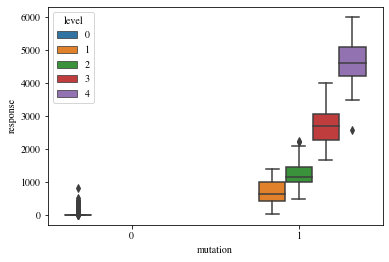

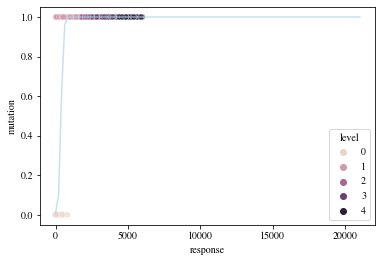

the cutoff point for 10 - 7-13 LCP-K-Q61L-11 [[383.31078648]]
plot of mutation: 11 - 16-3 LCP-K-Q61K-7


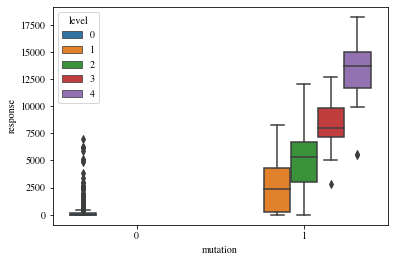

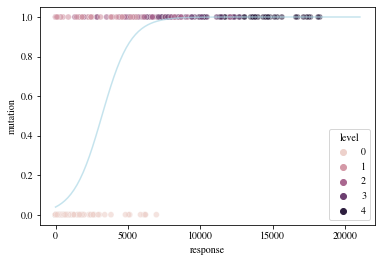

the cutoff point for 11 - 16-3 LCP-K-Q61K-7 [[3202.65366735]]
plot of mutation: 12 - 7-11 LCP-K-Q61R-12


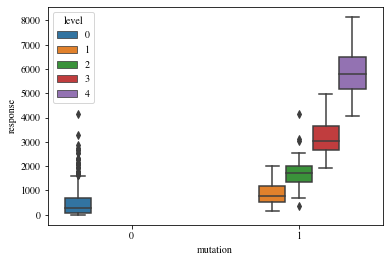

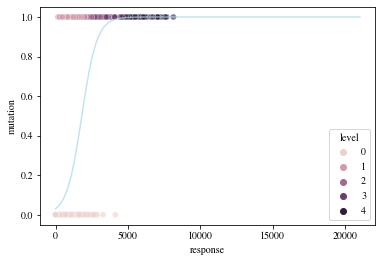

the cutoff point for 12 - 7-11 LCP-K-Q61R-12 [[1815.79546038]]
plot of mutation: 13 - 18-2 N-Q61K-dTCAP-3


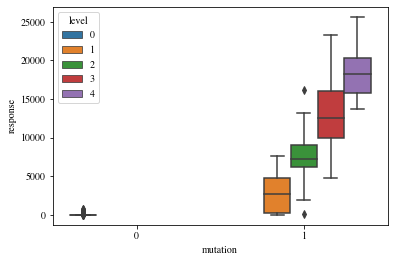

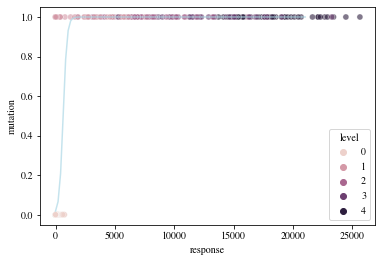

the cutoff point for 13 - 18-2 N-Q61K-dTCAP-3 [[640.09333793]]
plot of mutation: 14 - 13-17 N-Q61RG-dTCAP-2


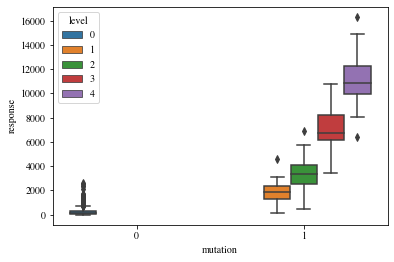

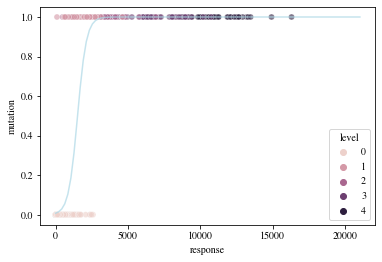

the cutoff point for 14 - 13-17 N-Q61RG-dTCAP-2 [[1519.73583537]]
plot of mutation: 15 - 7-6 LCP-N-Q61LT-8


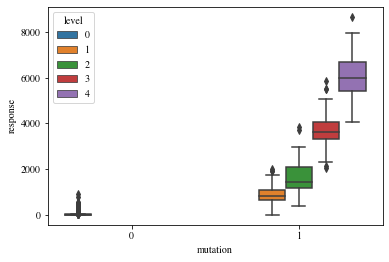

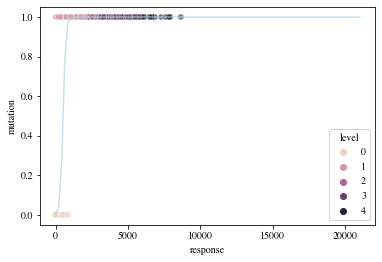

the cutoff point for 15 - 7-6 LCP-N-Q61LT-8 [[518.91035085]]
plot of mutation: 16 - 10-25 N-Q61HC-dTCAP-3


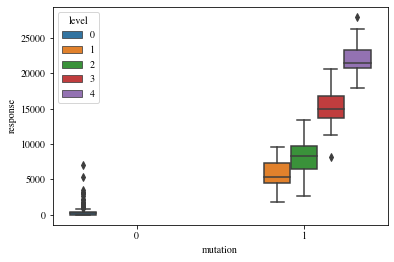

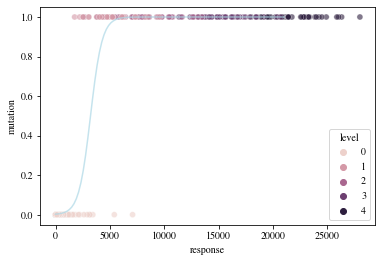

the cutoff point for 16 - 10-25 N-Q61HC-dTCAP-3 [[3217.69588077]]
plot of mutation: 17 - 10-26 N-Q61HT-dTCAP-2


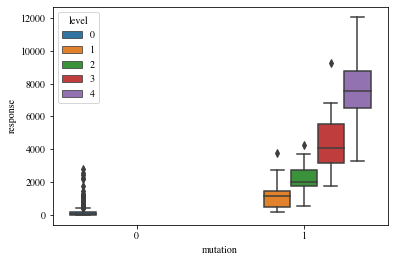

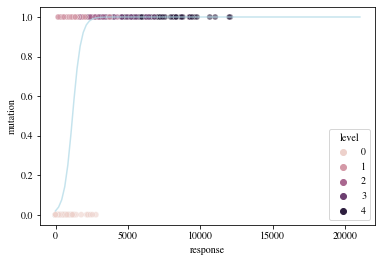

the cutoff point for 17 - 10-26 N-Q61HT-dTCAP-2 [[1175.43376614]]
plot of mutation: 18 - 3-5 PI-L542K-dTCAP-2


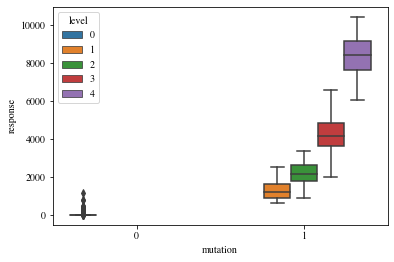

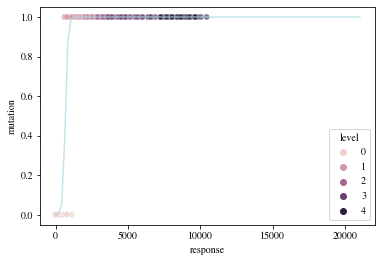

the cutoff point for 18 - 3-5 PI-L542K-dTCAP-2 [[676.8621852]]
plot of mutation: 19 - 3-7 PI-L545K-dTCAP-2


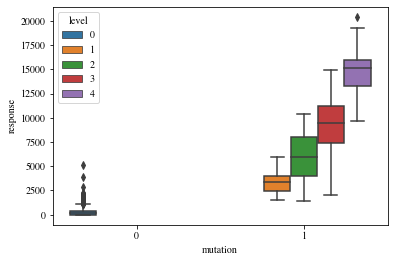

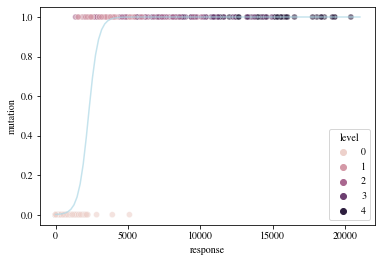

the cutoff point for 19 - 3-7 PI-L545K-dTCAP-2 [[2274.30996428]]
plot of mutation: 20 - 3-9 PI-L545Q-dTCAP-2


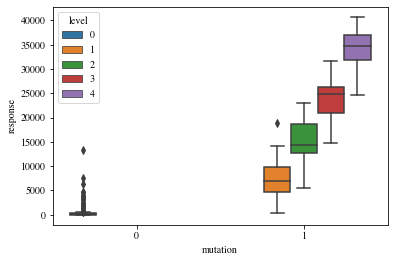

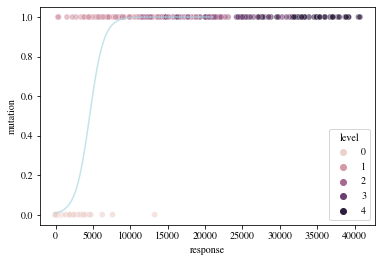

the cutoff point for 20 - 3-9 PI-L545Q-dTCAP-2 [[4563.97537657]]
plot of mutation: 21 - 68-1 PI-L1047R-CAP9


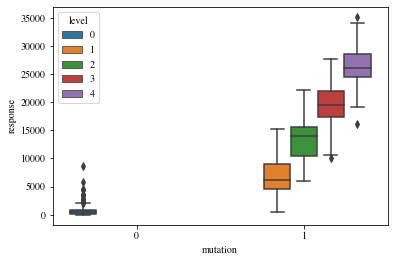

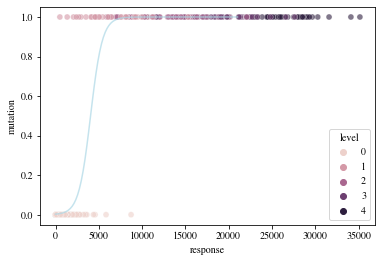

the cutoff point for 21 - 68-1 PI-L1047R-CAP9 [[4045.58724655]]
plot of mutation: 22 - 68-11 PI-L1047L-CAP7


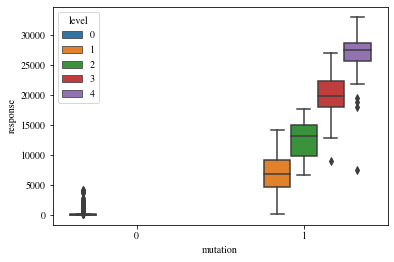

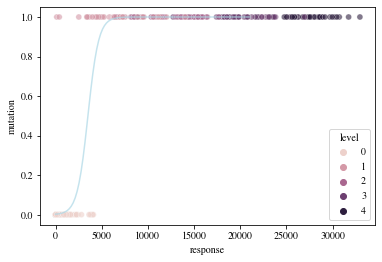

the cutoff point for 22 - 68-11 PI-L1047L-CAP7 [[3507.08036917]]
plot of mutation: 23 - 15-8 KB-V600E1-dTCAP-2


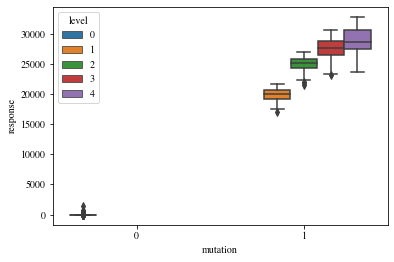

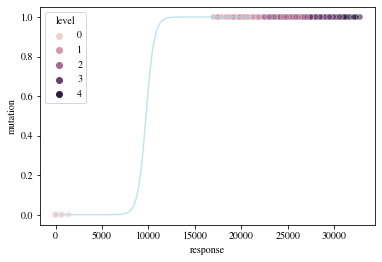

the cutoff point for 23 - 15-8 KB-V600E1-dTCAP-2 [[9735.55421037]]
plot of mutation: 24 - 4-16 LCP-E-6239-10


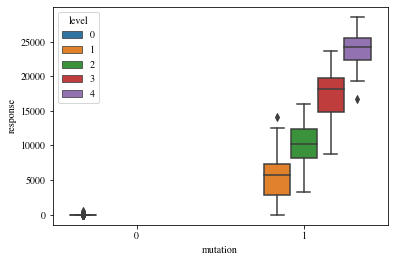

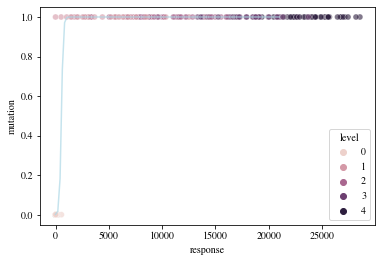

the cutoff point for 24 - 4-16 LCP-E-6239-10 [[551.30276741]]
plot of mutation: 25 - 64-1 LCP-E-6252-10


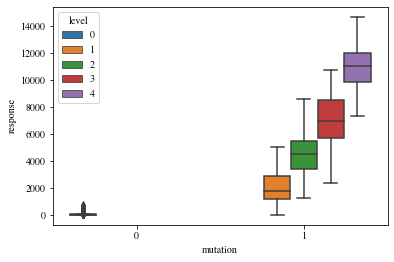

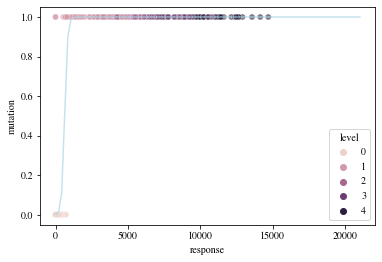

the cutoff point for 25 - 64-1 LCP-E-6252-10 [[629.87501317]]
plot of mutation: 26 - 85-2 LCP-E-6253-15


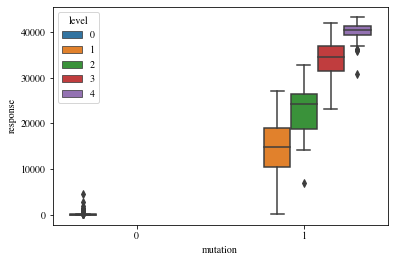

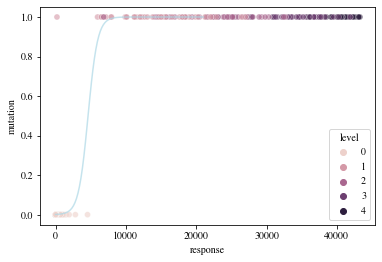

the cutoff point for 26 - 85-2 LCP-E-6253-15 [[4622.74176778]]
plot of mutation: 27 - EGFR Capture 57-10 6255


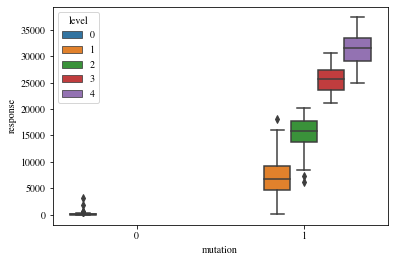

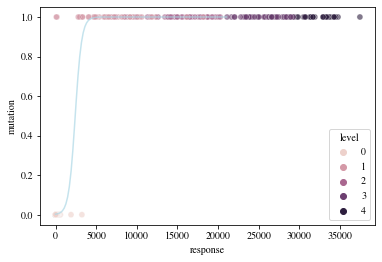

the cutoff point for 27 - EGFR Capture 57-10 6255 [[2419.67616736]]
plot of mutation: 28 - 59-6 LCP-E-12370-6


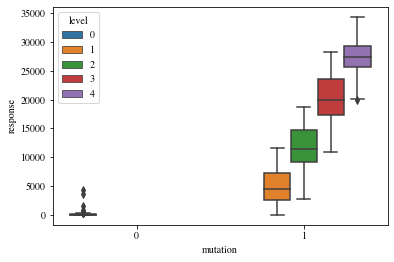

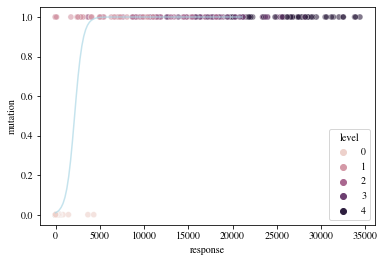

the cutoff point for 28 - 59-6 LCP-E-12370-6 [[2152.00574704]]
plot of mutation: 29 - EGFR Capture 57-15 12384


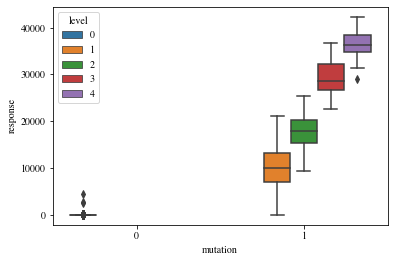

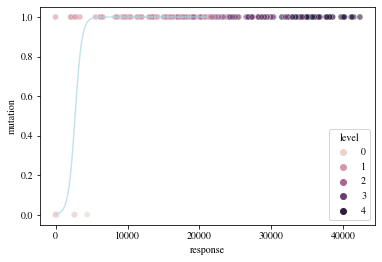

the cutoff point for 29 - EGFR Capture 57-15 12384 [[2719.3615916]]
plot of mutation: 30 - 62-1 LCP-E-6254/12369/23571-1


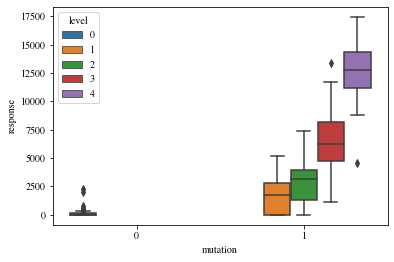

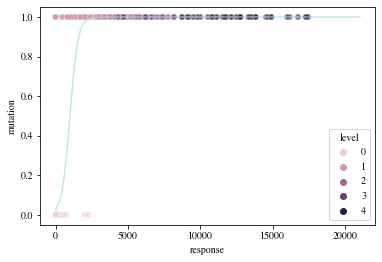

the cutoff point for 30 - 62-1 LCP-E-6254/12369/23571-1 [[997.0455106]]
plot of mutation: 31 - 3-2 EGFR-6223-dTCAP-2


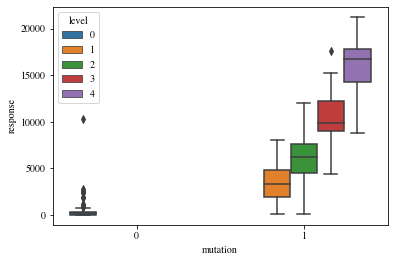

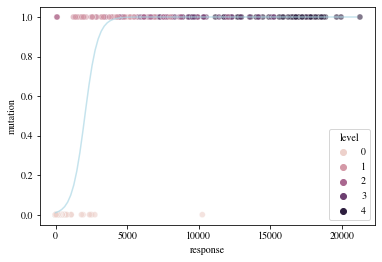

the cutoff point for 31 - 3-2 EGFR-6223-dTCAP-2 [[2047.19605802]]
plot of mutation: 32 - EGFR Capture 57-23 6225


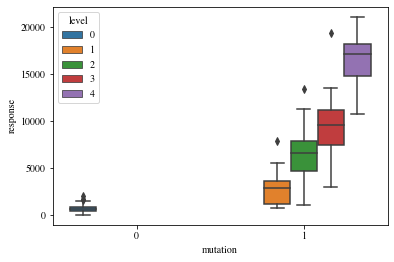

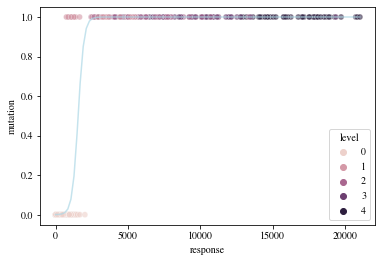

the cutoff point for 32 - EGFR Capture 57-23 6225 [[1560.83681253]]
plot of mutation: 33 - EGFR Capture 57-28 12382


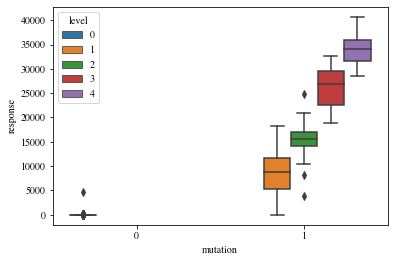

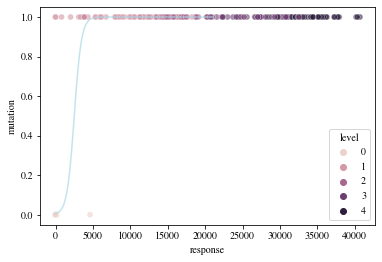

the cutoff point for 33 - EGFR Capture 57-28 12382 [[2500.99093145]]
plot of mutation: 34 - 70-4 LCP-E-Del24-m2-01


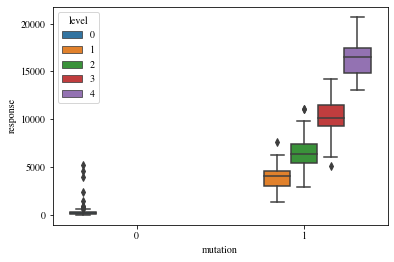

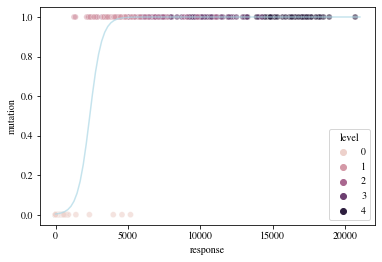

the cutoff point for 34 - 70-4 LCP-E-Del24-m2-01 [[2364.43202116]]
plot of mutation: 35 - EGFR Capture 57-17 12678


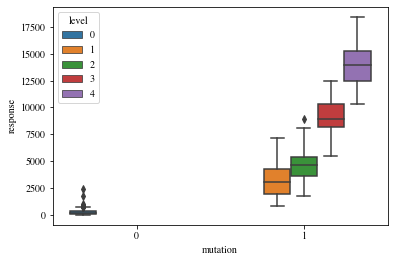

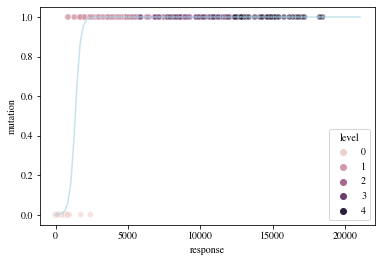

the cutoff point for 35 - EGFR Capture 57-17 12678 [[1358.60634412]]
plot of mutation: 36 - 46-3 LCP-E-6240-mis-13


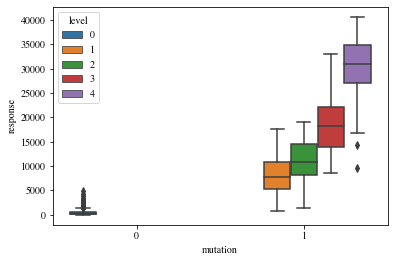

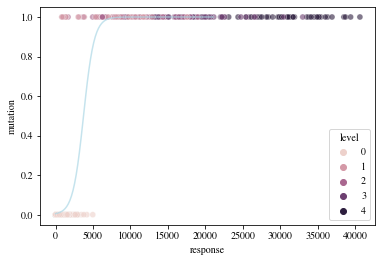

the cutoff point for 36 - 46-3 LCP-E-6240-mis-13 [[3737.71896371]]
plot of mutation: 37 - 24-8 EGFR-C797SA-2


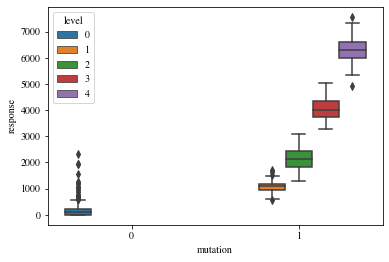

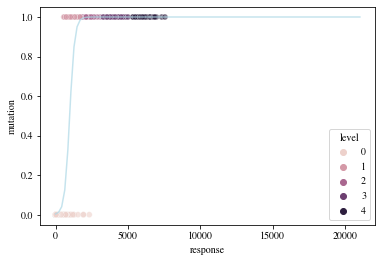

the cutoff point for 37 - 24-8 EGFR-C797SA-2 [[975.20018145]]
plot of mutation: 38 - 72-7 LCP-2390-m3-1


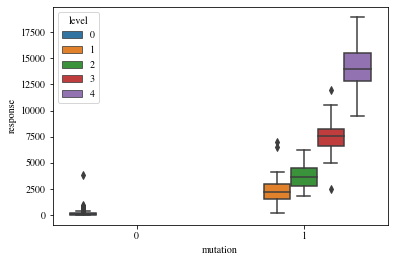

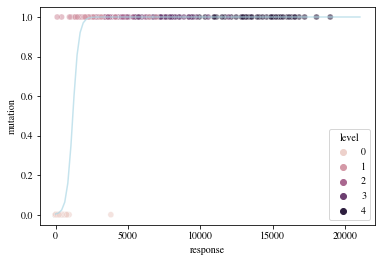

the cutoff point for 38 - 72-7 LCP-2390-m3-1 [[1191.69275548]]
plot of mutation: 39 - 54-5 LCP-E-6241-m3-08


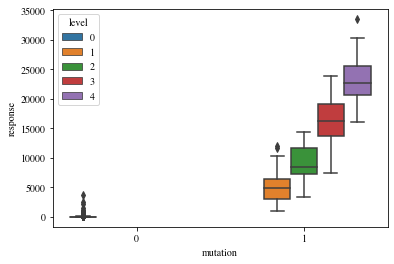

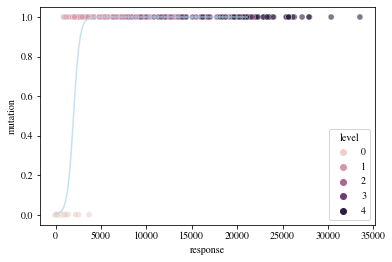

the cutoff point for 39 - 54-5 LCP-E-6241-m3-08 [[1983.70154237]]
plot of mutation: 40 - 58-4 LCP-E-12376-m2-06


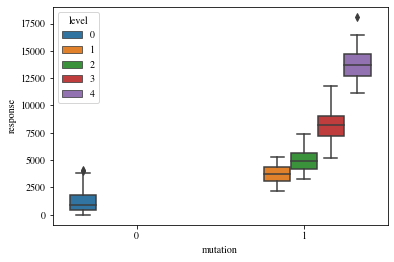

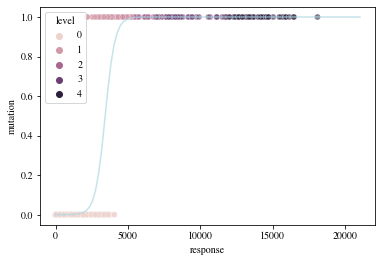

the cutoff point for 40 - 58-4 LCP-E-12376-m2-06 [[3430.18824202]]
plot of mutation: 41 - 63-3 LCP-E-12377-m2-05


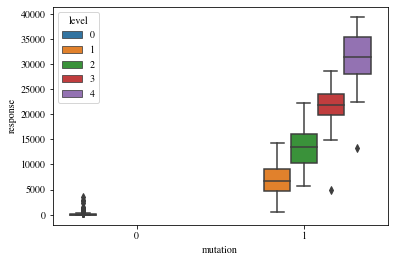

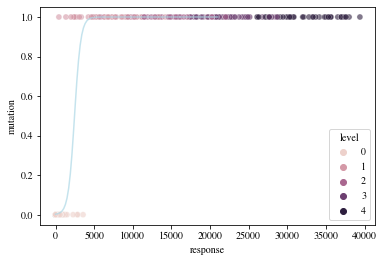

the cutoff point for 41 - 63-3 LCP-E-12377-m2-05 [[2458.38865295]]
plot of mutation: 42 - 68-13 LCP-E-12378-08


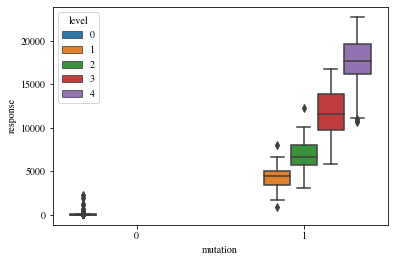

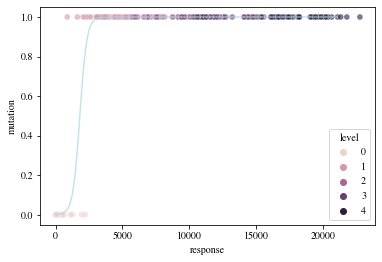

the cutoff point for 42 - 68-13 LCP-E-12378-08 [[1815.73693295]]
plot of mutation: 43 - 59-1 LCP-E-6224-12


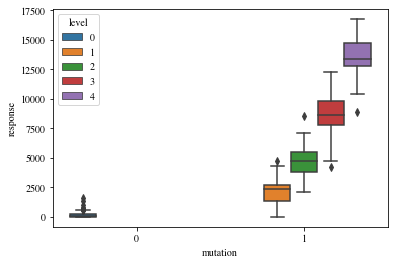

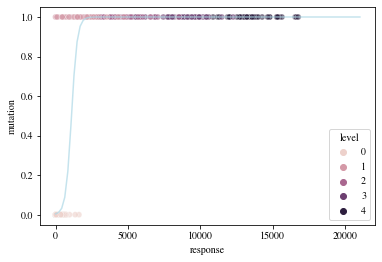

the cutoff point for 43 - 59-1 LCP-E-6224-12 [[1101.75428624]]
plot of mutation: 44 - 10-7 LCP-E-6213-1


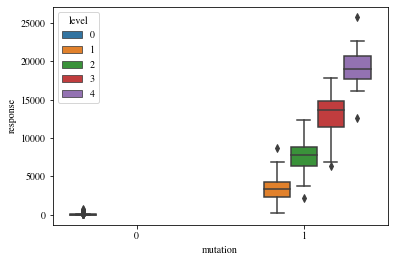

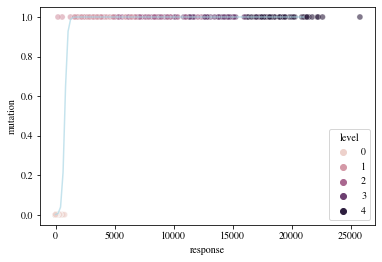

the cutoff point for 44 - 10-7 LCP-E-6213-1 [[780.59957836]]
plot of mutation: 45 - 71-1 LCP-A_E17K-05


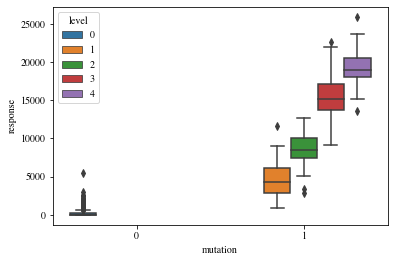

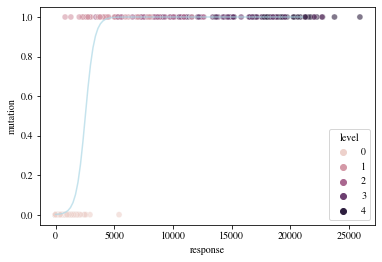

the cutoff point for 45 - 71-1 LCP-A_E17K-05 [[2537.31969086]]
plot of mutation: 46 - 52-6 LCP-M-Q56P-02


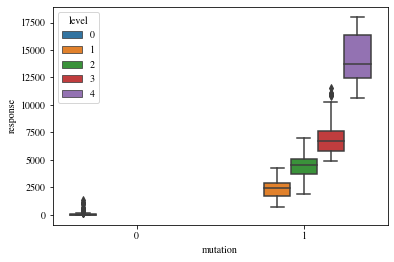

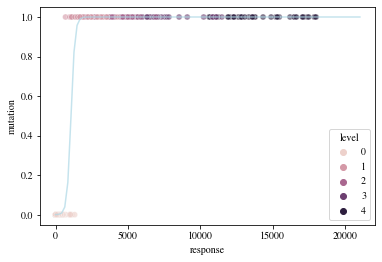

the cutoff point for 46 - 52-6 LCP-M-Q56P-02 [[1068.55885203]]
plot of mutation: 47 - 52-9 LCP-M-K57N-01


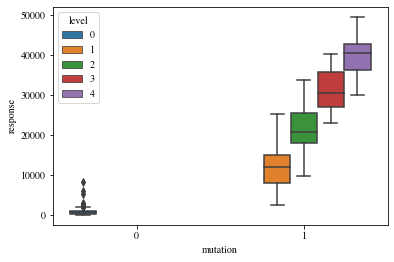

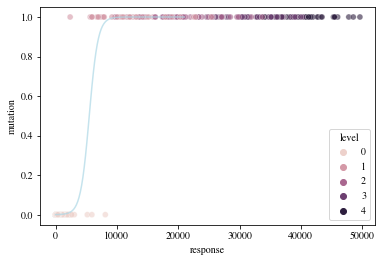

the cutoff point for 47 - 52-9 LCP-M-K57N-01 [[5496.37876642]]
plot of mutation: 48 - 56-6 LCP-HER2-12558-m3-01


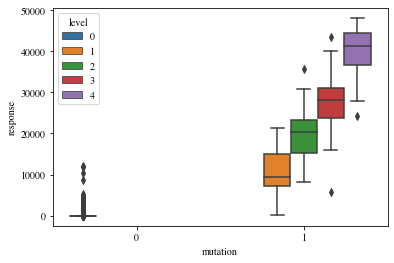

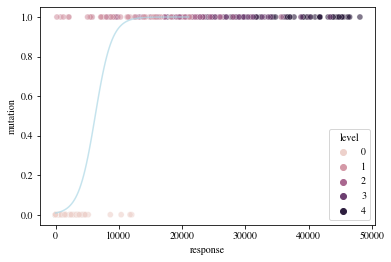

the cutoff point for 48 - 56-6 LCP-HER2-12558-m3-01 [[6264.87240823]]
running time:  40.717933654785156


In [53]:
#draw out the box plot of five levels
#the scatter plot and logistic regression
#the proba50 cutoff
import time
start = time.time()
curve = np.linspace(0,max(mutation['response']),100).reshape(-1,1)
for i in range(49):
    mutation_c = pd.DataFrame()
    mutation_c['response'] = control.iloc[i,1:]
    mutation_c['mutation'] = 0
    mutation_c['level'] = 0
    mutation_m = pd.DataFrame()
    mutation_m['response'] = merge.iloc[i,1:]
    mutation_m['mutation'] = 1
    mutation_m = pd.concat([mutation_m.reset_index(drop=True),pd.DataFrame(level,columns=['level'])],axis=1)
    mutation = pd.concat([mutation_c.reset_index(drop=True),mutation_m],axis=0).reset_index(drop=True)
    mutation['response'] = mutation['response'].astype('int')
    clf = LogisticRegression()
    X = mutation['response'].values.reshape(-1,1)
    Y = mutation['mutation'].values.reshape(-1,1)
    print('plot of mutation:',i,'-',merge.iloc[i,0])
    clf.fit(X,np.ravel(Y.astype(int)))
    ax = sns.boxplot(data=mutation, x='mutation', y='response',hue='level')
    plt.show()
    sns.scatterplot(data=mutation,x='response',y='mutation',hue='level',alpha=0.6)
    plt.plot(curve,clf.predict_proba(curve)[:,1],alpha=0.7,color='lightblue')
    plt.show()
    print('the cutoff point for',i,'-',merge.iloc[i,0], proba_50(clf))
end = time.time()
print('running time: ',end-start)

In [25]:
#count the false outside gray area
def count_large_native(data,upperbound):
    count = sum(((data['mutation']==0)&(data['response']>upperbound)))
    return count
def count_small_mutation(data,lowerbound):
    count = sum(((data['mutation']==1)&(data['response']<lowerbound)))
    return count

In [19]:
#count the number in gray area
def count_num(data,lower,upper):
    count = 0
    for i in data:
        if lower <= i <= upper:
            count += 1
    return count

In [27]:
#method1
#upper bound = max(native)
#lower bound = proba50 cutoff
start = time.time()
method_1 = pd.DataFrame(columns=['Index','Name','Lower','Upper','Gray rate','FN rate','Native','Mutated','Bignative','Smallmutation'])
for i in range(49):
    #build dataframe for each mutation
    #control
    mutation_c = pd.DataFrame()
    mutation_c['response'] = control.iloc[i,1:]
    mutation_c['mutation'] = 0
    mutation_c['level'] = 0
    #mutated
    mutation_m = pd.DataFrame()
    mutation_m['response'] = merge.iloc[i,1:]
    mutation_m['mutation'] = 1
    mutation_m = pd.concat([mutation_m.reset_index(drop=True),pd.DataFrame(level,columns=['level'])],axis=1)
    mutation = pd.concat([mutation_c.reset_index(drop=True),mutation_m],axis=0).reset_index(drop=True)
    mutation['response'] = mutation['response'].astype('int')
    #fit
    clf = LogisticRegression()
    X = mutation['response'].values.reshape(-1,1)
    Y = mutation['mutation'].values.reshape(-1,1)
    clf.fit(X,np.ravel(Y.astype(int)))
    #calculating lower and upper bounds
    upper = max(mutation_c.iloc[:,0])
    lower = float(proba_50(clf))        
    if lower > upper:
        print('the bounds of gray area of ','***',i,merge.iloc[i,0],'***',' is ')
        print('no gray area')
        #store np.nan
        method_1 = method_1.append({'Index':i,'Name':merge.iloc[i,0],'Lower':lower,'Upper':upper,'Gray rate':np.nan,'FN rate':np.nan,'Native':np.nan,'Mutated':np.nan,'Bignative':np.nan,'Smallmutation':np.nan},ignore_index=True)
    else:
    #count the proportion of data in the gray area
        gray_num = count_num(mutation.iloc[:,0],lower,upper)
        native = count_num(mutation_c.iloc[:,0],lower,upper)
        mutated = count_num(mutation_m.iloc[:,0],lower,upper)
        big_native = count_large_native(mutation,upper)
        small_mutation = count_small_mutation(mutation,lower)
    #store into a dataframe
        method_1 = method_1.append({'Index':i,'Name':merge.iloc[i,0],'Lower':lower,'Upper':upper,'Gray rate':gray_num/len(mutation),'FN rate':mutated/(native+mutated),'Native':native,'Mutated':mutated,'Bignative':big_native,'Smallmutation':small_mutation},ignore_index=True)
    #print out the result
        print('the bounds of gray area of ','***',i,merge.iloc[i,0],'***',' is ','( {} , {} )'.format(lower,upper))
        print('the proportion of data in the gray area is ',gray_num/len(mutation))
        print('There are {} native and {} mutated in gray area: False Negative {}%'.format(native,mutated,mutated/(native+mutated)))
        print('***number of large_native is {}, number of small_mutation is {}'.format(big_native,small_mutation))
#out put the result as csv
method_1.to_csv('method_1.csv')
#how long does it take?
end = time.time()
print('running time: ',end-start)

the bounds of gray area of  *** 0 4-2 LCP-K-G12A-3 ***  is  ( 2719.6661916705943 , 5809.0 )
the proportion of data in the gray area is  0.02313624678663239
There are 3 native and 15 mutated in gray area: False Negative 0.8333333333333334%
***number of large_native is 0, number of small_mutation is 7
the bounds of gray area of  *** 1 86-2 K-G12D-dTCAP-1 ***  is  ( 2349.476042400679 , 5449.0 )
the proportion of data in the gray area is  0.07712082262210797
There are 9 native and 51 mutated in gray area: False Negative 0.85%
***number of large_native is 0, number of small_mutation is 17
the bounds of gray area of  *** 2 87-2 K-G12V-dTCAP-1 ***  is  ( 1802.2678992833648 , 5809.0 )
the proportion of data in the gray area is  0.056555269922879174
There are 4 native and 40 mutated in gray area: False Negative 0.9090909090909091%
***number of large_native is 0, number of small_mutation is 8
the bounds of gray area of  *** 3 4-7 LCP-K-G12C-3 ***  is  ( 1865.011348170668 , 5646 )
the proportion 

the bounds of gray area of  *** 34 70-4 LCP-E-Del24-m2-01 ***  is  ( 2364.4320211642967 , 5178.0 )
the proportion of data in the gray area is  0.056555269922879174
There are 3 native and 41 mutated in gray area: False Negative 0.9318181818181818%
***number of large_native is 0, number of small_mutation is 5
the bounds of gray area of  *** 35 EGFR Capture 57-17 12678 ***  is  ( 1358.606344115793 , 2404 )
the proportion of data in the gray area is  0.02442159383033419
There are 2 native and 17 mutated in gray area: False Negative 0.8947368421052632%
***number of large_native is 0, number of small_mutation is 4
the bounds of gray area of  *** 36 46-3 LCP-E-6240-mis-13 ***  is  ( 3737.7189637103997 , 4970.0 )
the proportion of data in the gray area is  0.006426735218508998
There are 3 native and 2 mutated in gray area: False Negative 0.4%
***number of large_native is 0, number of small_mutation is 12
the bounds of gray area of  *** 37 24-8 EGFR-C797SA-2 ***  is  ( 975.2001814501614 , 2329.

In [20]:
def cut_data_1000(data):
    cut_low = min(data)
    cut_high = max(data)
    cut = np.linspace(cut_low,cut_high,1000)
    return(cut)

def find_roc_best(mutation_c,mutation_m,cut):
    SUM_best = 0
    best_cut = 0
    for i in cut:
        TN_N = sum(mutation_c.iloc[:,0] < i) / len(mutation_c)
        TP_P = sum(mutation_m.iloc[:,0] > i) / len(mutation_m)
        SUM = TN_N+TP_P
        if SUM > SUM_best:
            best_cut = i
            SUM_best = SUM
    return(best_cut,SUM_best)
        
def find_max_accu(mutation_c,mutation_m,mutation,cut):
    accuracy_best = 0
    best_cut = 0
    for i in cut:
        TN = sum(mutation_c.iloc[:,0] < i)
        TP = sum(mutation_m.iloc[:,0] > i)
        accuracy = (TP+TN)/len(mutation)
        if accuracy > accuracy_best:
            best_cut = i
            accuracy_best = accuracy
    return(best_cut,accuracy_best)

In [28]:
#upper bound = max(native)
#lower bound = best roc cutoff
start = time.time()
method_2 = pd.DataFrame(columns=['Index','Name','Lower','Upper','Gray rate','FN rate','Native','Mutated','Bignative','Smallmutation'])
for i in range(49):
    #build dataframe for each mutation
    #control
    mutation_c = pd.DataFrame()
    mutation_c['response'] = control.iloc[i,1:]
    mutation_c['mutation'] = 0
    mutation_c['level'] = 0
    #mutated
    mutation_m = pd.DataFrame()
    mutation_m['response'] = merge.iloc[i,1:]
    mutation_m['mutation'] = 1
    mutation_m = pd.concat([mutation_m.reset_index(drop=True),pd.DataFrame(level,columns=['level'])],axis=1)
    mutation = pd.concat([mutation_c.reset_index(drop=True),mutation_m],axis=0).reset_index(drop=True)
    mutation['response'] = mutation['response'].astype('int')
    #calculating lower and upper bounds
    upper = max(mutation_c.iloc[:,0])
    #cut the data
    cut = cut_data_1000(mutation.iloc[:,0])
    #find the best criteria that separate Postive and Negative
    lower,SUM_best = find_roc_best(mutation_c,mutation_m,cut)
    if lower > upper:
        print('the bounds of gray area of ','***',i,merge.iloc[i,0],'***',' is ')
        print('no gray area')
        #store np.nan
        method_2 = method_2.append({'Index':i,'Name':merge.iloc[i,0],'Lower':lower,'Upper':upper,
                                    'Gray rate':np.nan,'FN rate':np.nan,'Native':np.nan,'Mutated':np.nan,
                                    'Bignative':np.nan,'Smallmutation':np.nan},ignore_index=True)
    else:
    #count the proportion of data in the gray area
        gray_num = count_num(mutation.iloc[:,0],lower,upper)
        native = count_num(mutation_c.iloc[:,0],lower,upper)
        mutated = count_num(mutation_m.iloc[:,0],lower,upper)
        big_native = count_large_native(mutation,upper)
        small_mutation = count_small_mutation(mutation,lower)
        #store into a dataframe
        method_2 = method_2.append({'Index':i,'Name':merge.iloc[i,0],'Lower':lower,'Upper':upper,
                                    'Gray rate':gray_num/len(mutation),'FN rate':mutated/(native+mutated),
                                    'Native':native,'Mutated':mutated,'Bignative':big_native,'Smallmutation':small_mutation},
                                   ignore_index=True)
    #print out the result
        print('the Best SUM of the cut :',SUM_best)
        print('the bounds of gray area of ','***',i,merge.iloc[i,0],'***',' is ','( {} , {} )'.format(lower,upper))
        print('the proportion of data in the gray area is ',gray_num/len(mutation))
        print('There are {} native and {} mutated in gray area: False Negative {}%'.format(native,mutated,mutated/
                                                                                           (native+mutated)))
        print('***number of large_native is {}, number of small_mutation is {}'.format(big_native,
                                                                                       small_mutation))
        #output the result as csv
method_2.to_csv('method_2.csv')
#how long does it take?
end = time.time()
print('running time: ',end-start)

the Best SUM of the cut : 1.9712724434035909
the bounds of gray area of  *** 0 4-2 LCP-K-G12A-3 ***  is  ( 1543.8178178178177 , 5809.0 )
the proportion of data in the gray area is  0.02699228791773779
There are 3 native and 18 mutated in gray area: False Negative 0.8571428571428571%
***number of large_native is 0, number of small_mutation is 4
the Best SUM of the cut : 1.9210577673692426
the bounds of gray area of  *** 1 86-2 K-G12D-dTCAP-1 ***  is  ( 988.8978978978979 , 5449.0 )
the proportion of data in the gray area is  0.11953727506426735
There are 30 native and 63 mutated in gray area: False Negative 0.6774193548387096%
***number of large_native is 0, number of small_mutation is 5
the Best SUM of the cut : 1.9809328649492586
the bounds of gray area of  *** 2 87-2 K-G12V-dTCAP-1 ***  is  ( 373.1191191191191 , 5809.0 )
the proportion of data in the gray area is  0.07069408740359898
There are 8 native and 47 mutated in gray area: False Negative 0.8545454545454545%
***number of large_

the Best SUM of the cut : 1.986455893832943
the bounds of gray area of  *** 27 EGFR Capture 57-10 6255 ***  is  ( 1911.6066066066066 , 3243.0 )
the proportion of data in the gray area is  0.006426735218508998
There are 1 native and 4 mutated in gray area: False Negative 0.8%
***number of large_native is 0, number of small_mutation is 2
the Best SUM of the cut : 1.9610070257611243
the bounds of gray area of  *** 28 59-6 LCP-E-12370-6 ***  is  ( 1479.5615615615613 , 4312.0 )
the proportion of data in the gray area is  0.02570694087403599
There are 2 native and 18 mutated in gray area: False Negative 0.9%
***number of large_native is 0, number of small_mutation is 6
the Best SUM of the cut : 1.9891295862607339
the bounds of gray area of  *** 29 EGFR Capture 57-15 12384 ***  is  ( 253.96996996996995 , 4403 )
the proportion of data in the gray area is  0.010282776349614395
There are 3 native and 5 mutated in gray area: False Negative 0.625%
***number of large_native is 0, number of small_mu

In [29]:
#upper bound = max(native)
#lower bound = best accuracy
start = time.time()
method_3 = pd.DataFrame(columns=['Index','Name','Lower','Upper','Gray rate','FN rate','Native','Mutated','Bignative','Smallmutation'])
for i in range(49):
    #build dataframe for each mutation
    #control
    mutation_c = pd.DataFrame()
    mutation_c['response'] = control.iloc[i,1:]
    mutation_c['mutation'] = 0
    mutation_c['level'] = 0
    #mutated
    mutation_m = pd.DataFrame()
    mutation_m['response'] = merge.iloc[i,1:]
    mutation_m['mutation'] = 1
    mutation_m = pd.concat([mutation_m.reset_index(drop=True),pd.DataFrame(level,columns=['level'])],axis=1)
    mutation = pd.concat([mutation_c.reset_index(drop=True),mutation_m],axis=0).reset_index(drop=True)
    mutation['response'] = mutation['response'].astype('int')
    #calculating lower and upper bounds
    upper = max(mutation_c.iloc[:,0])
    #cut the data
    cut = cut_data_1000(mutation.iloc[:,0])
    #find the best criteria that separate Postive and Negative
    lower,accuracy_best = find_max_accu(mutation_c,mutation_m,mutation,cut)
    if lower > upper:
        print('the bounds of gray area of ','***',i,merge.iloc[i,0],'***',' is ')
        print('no gray area')
    #store np.nan
        method_3 = method_3.append({'Index':i,'Name':merge.iloc[i,0],'Lower':lower,'Upper':upper,
                                    'Gray rate':np.nan,'FN rate':np.nan,'Native':np.nan,'Mutated':np.nan,
                                    'Bignative':np.nan,'Smallmutation':np.nan},ignore_index=True)
    else:
    #count the proportion of data in the gray area
        gray_num = count_num(mutation.iloc[:,0],lower,upper)
        native = count_num(mutation_c.iloc[:,0],lower,upper)
        mutated = count_num(mutation_m.iloc[:,0],lower,upper)
        big_native = count_large_native(mutation,upper)
        small_mutation = count_small_mutation(mutation,lower)
        #store into a dataframe
        method_3 = method_3.append({'Index':i,'Name':merge.iloc[i,0],'Lower':lower,'Upper':upper,
                                    'Gray rate':gray_num/len(mutation),'FN rate':mutated/(native+mutated),
                                    'Native':native,'Mutated':mutated,'Bignative':big_native,'Smallmutation':small_mutation},
                                   ignore_index=True)
    #print out the result
        print('the Best SUM of the cut :',SUM_best)
        print('the bounds of gray area of ','***',i,merge.iloc[i,0],'***',' is ','( {} , {} )'.format(lower,upper))
        print('the proportion of data in the gray area is ',gray_num/len(mutation))
        print('There are {} native and {} mutated in gray area: False Negative {}%'.format(native,mutated,mutated/
                                                                                           (native+mutated)))
        print('***number of large_native is {}, number of small_mutation is {}'.format(big_native,
                                                                                       small_mutation))
#output the result as csv
method_3.to_csv('method_3.csv')
#how long does it take?
end = time.time()
print('running time: ',end-start)

the Best SUM of the cut : 1.9620413739266198
the bounds of gray area of  *** 0 4-2 LCP-K-G12A-3 ***  is  ( 1543.8178178178177 , 5809.0 )
the proportion of data in the gray area is  0.02699228791773779
There are 3 native and 18 mutated in gray area: False Negative 0.8571428571428571%
***number of large_native is 0, number of small_mutation is 4
the Best SUM of the cut : 1.9620413739266198
the bounds of gray area of  *** 1 86-2 K-G12D-dTCAP-1 ***  is  ( 2484.922922922923 , 5449.0 )
the proportion of data in the gray area is  0.07326478149100257
There are 6 native and 51 mutated in gray area: False Negative 0.8947368421052632%
***number of large_native is 0, number of small_mutation is 17
the Best SUM of the cut : 1.9620413739266198
the bounds of gray area of  *** 2 87-2 K-G12V-dTCAP-1 ***  is  ( 373.1191191191191 , 5809.0 )
the proportion of data in the gray area is  0.07069408740359898
There are 8 native and 47 mutated in gray area: False Negative 0.8545454545454545%
***number of large_

the Best SUM of the cut : 1.9620413739266198
the bounds of gray area of  *** 28 59-6 LCP-E-12370-6 ***  is  ( 1479.5615615615613 , 4312.0 )
the proportion of data in the gray area is  0.02570694087403599
There are 2 native and 18 mutated in gray area: False Negative 0.9%
***number of large_native is 0, number of small_mutation is 6
the Best SUM of the cut : 1.9620413739266198
the bounds of gray area of  *** 29 EGFR Capture 57-15 12384 ***  is  ( 253.96996996996995 , 4403 )
the proportion of data in the gray area is  0.010282776349614395
There are 3 native and 5 mutated in gray area: False Negative 0.625%
***number of large_native is 0, number of small_mutation is 1
the Best SUM of the cut : 1.9620413739266198
the bounds of gray area of  *** 30 62-1 LCP-E-6254/12369/23571-1 ***  is  ( 733.6336336336336 , 2279.0 )
the proportion of data in the gray area is  0.03984575835475578
There are 2 native and 29 mutated in gray area: False Negative 0.9354838709677419%
***number of large_native is 

In [31]:
#define the bootstrap method and it returns the list of all proba_50 values
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
def bootstrap(data,sam_pro,repeat_times):
    bootstrap_proba50 = []
    for i in range(repeat_times):
        sample = data.sample(frac=sam_pro)
        X = sample['response'].values.reshape(-1,1)+0.1
        Y = sample['mutation'].values.reshape(-1,1)
        clf.fit(X,np.ravel(Y.astype(int)))
        proba50 = float(-(clf.intercept_/clf.coef_))
        bootstrap_proba50.append(proba50)
    return bootstrap_proba50

In [31]:
#testing the function for a mutation
bootstrap_proba50 = bootstrap(mutation,0.8,1000)
print('the upper bound is ',max(bootstrap_proba50),', the lower bound is ',min(bootstrap_proba50))

the upper bound is  1784.1952418005762 , the lower bound is  1390.6209666856607


In [47]:
merge.iloc[:,1:].astype(float).transpose().describe().to_csv('merge_summary.csv')

In [46]:
control.iloc[:,1:].astype(float).transpose().describe().to_csv('control_summary.csv')

In [33]:
#fourth method
#conduct bootstrap method to find the distribution proba50
start = time.time()
method_4 = pd.DataFrame(columns=['Index','Name','Lower','Upper','Gray rate','FN rate','Native','Mutated','Bignative','Smallmutation'])
proba50_dis = []
for i in range(49):
    #build dataframe for each mutation
    #control
    mutation_c = pd.DataFrame()
    mutation_c['response'] = control.iloc[i,1:]
    mutation_c['mutation'] = 0
    mutation_c['level'] = 0
    #mutated
    mutation_m = pd.DataFrame()
    mutation_m['response'] = merge.iloc[i,1:]
    mutation_m['mutation'] = 1
    mutation_m = pd.concat([mutation_m.reset_index(drop=True),pd.DataFrame(level,columns=['level'])],axis=1)
    mutation = pd.concat([mutation_c.reset_index(drop=True),mutation_m],axis=0).reset_index(drop=True)
    mutation['response'] = mutation['response'].astype('int')
    #bootstrap
    bootstrap_proba50 = bootstrap(mutation,0.8,1000) #this is a list of 1000 proba50
    proba50_dis.append(bootstrap_proba50)
    #calculating lower and upper bounds
    upper = max(bootstrap_proba50)
    lower = min(bootstrap_proba50)
    gray_num = count_num(mutation.iloc[:,0],lower,upper)
    native = count_num(mutation_c.iloc[:,0],lower,upper)
    mutated = count_num(mutation_m.iloc[:,0],lower,upper)
    big_native = count_large_native(mutation,upper)
    small_mutation = count_small_mutation(mutation,lower)
    #store into a df
    try:
        FN_rate = mutated/(native+mutated)
    except:
        FN_rate = 0
    method_4 = method_4.append({'Index':i,'Name':merge.iloc[i,0],'Lower':lower,'Upper':upper,
                                'Gray rate':gray_num/len(mutation),'FN rate':FN_rate,
                                'Native':native,'Mutated':mutated,'Bignative':big_native,'Smallmutation':small_mutation},
                                ignore_index=True)
    #print out the result
    print('the bounds of gray area of ','***',i,merge.iloc[i,0],'***',' is ','( {} , {} )'.format(lower,upper))
    print('the proportion of data in the gray area is ',gray_num/len(mutation))
    print('There are {} native and {} mutated in gray area: False Negative {}%'.format(native,mutated,FN_rate))
    print('***number of large_native is {}, number of small_mutation is {}'.format(big_native,
                                                                                       small_mutation))
#output the result as csv
method_4.to_csv('method_4.csv')
#how long does it take?
end = time.time()
print('running time: ',end-start)

the bounds of gray area of  *** 0 4-2 LCP-K-G12A-3 ***  is  ( 1579.5390241540533 , 3373.584904960481 )
the proportion of data in the gray area is  0.010282776349614395
There are 1 native and 7 mutated in gray area: False Negative 0.875%
***number of large_native is 2, number of small_mutation is 4
the bounds of gray area of  *** 1 86-2 K-G12D-dTCAP-1 ***  is  ( 1988.882283831981 , 2592.142695556691 )
the proportion of data in the gray area is  0.016709511568123392
There are 7 native and 6 mutated in gray area: False Negative 0.46153846153846156%
***number of large_native is 6, number of small_mutation is 13
the bounds of gray area of  *** 2 87-2 K-G12V-dTCAP-1 ***  is  ( 1189.2237676970449 , 2183.0704629743286 )
the proportion of data in the gray area is  0.016709511568123392
There are 3 native and 10 mutated in gray area: False Negative 0.7692307692307693%
***number of large_native is 3, number of small_mutation is 3
the bounds of gray area of  *** 3 4-7 LCP-K-G12C-3 ***  is  ( 1062.7

the bounds of gray area of  *** 27 EGFR Capture 57-10 6255 ***  is  ( 1398.2411426064045 , 2830.08231399966 )
the proportion of data in the gray area is  0.002570694087403599
There are 1 native and 1 mutated in gray area: False Negative 0.5%
***number of large_native is 1, number of small_mutation is 2
the bounds of gray area of  *** 28 59-6 LCP-E-12370-6 ***  is  ( 1380.1167870799893 , 2707.896343348045 )
the proportion of data in the gray area is  0.008997429305912597
There are 1 native and 6 mutated in gray area: False Negative 0.8571428571428571%
***number of large_native is 2, number of small_mutation is 6


/Users/liu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the bounds of gray area of  *** 29 EGFR Capture 57-15 12384 ***  is  ( 1110.7918338215777 , 4986.594336043558 )
the proportion of data in the gray area is  0.010282776349614395
There are 3 native and 5 mutated in gray area: False Negative 0.625%
***number of large_native is 0, number of small_mutation is 1
the bounds of gray area of  *** 30 62-1 LCP-E-6254/12369/23571-1 ***  is  ( 728.5931650788265 , 1165.1696466673418 )
the proportion of data in the gray area is  0.008997429305912597
There are 1 native and 6 mutated in gray area: False Negative 0.8571428571428571%
***number of large_native is 2, number of small_mutation is 19
the bounds of gray area of  *** 31 3-2 EGFR-6223-dTCAP-2 ***  is  ( 1516.4384882192305 , 2493.0811441333108 )
the proportion of data in the gray area is  0.019280205655526992
There are 4 native and 11 mutated in gray area: False Negative 0.7333333333333333%
***number of large_native is 3, number of small_mutation is 7
the bounds of gray area of  *** 32 EGFR Captu

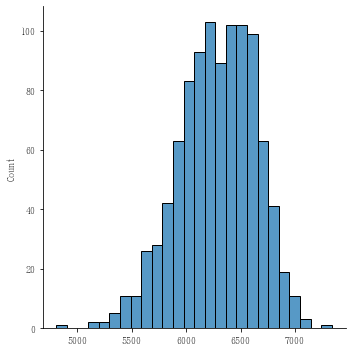

In [34]:
#last time output4 csv files
#put them into a excel and start to write analysis and discussion
sns.displot(bootstrap_proba50)

In [7]:
proba50_dis = pd.read_csv('proba50_distribution.csv').drop(columns='Unnamed: 0')

/Users/liu/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


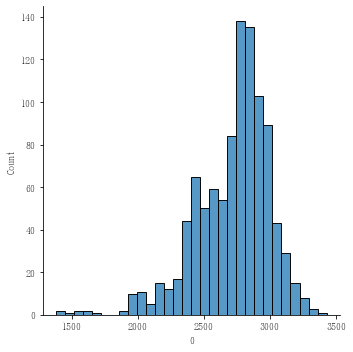

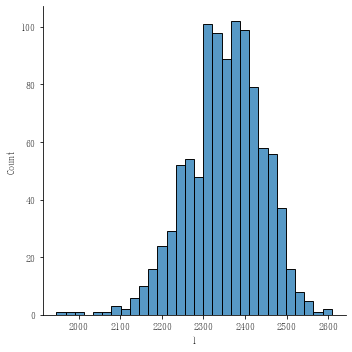

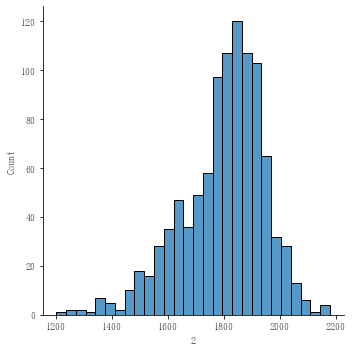

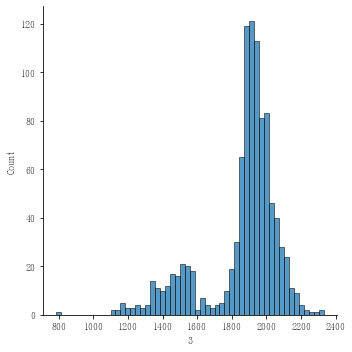

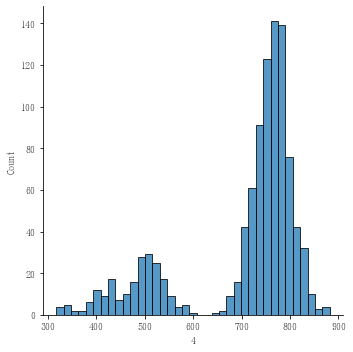

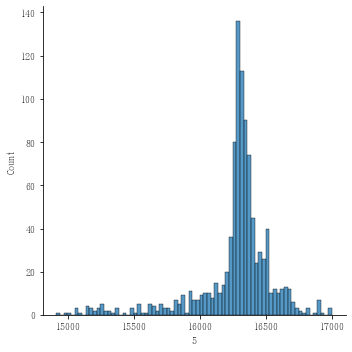

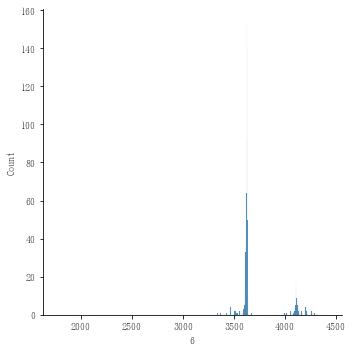

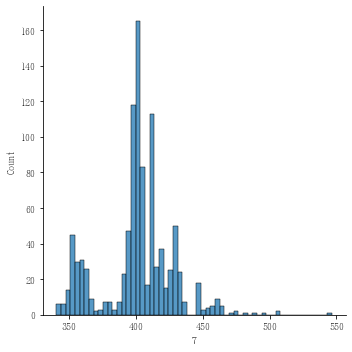

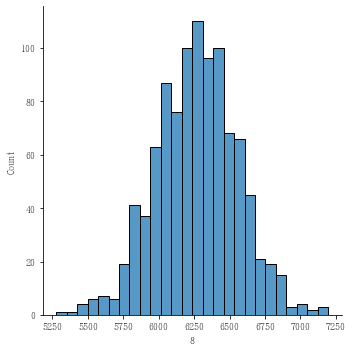

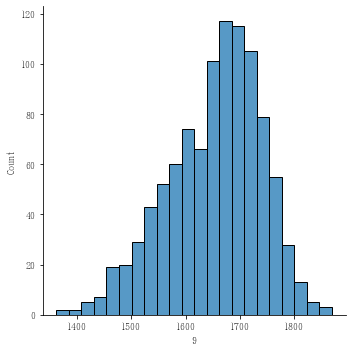

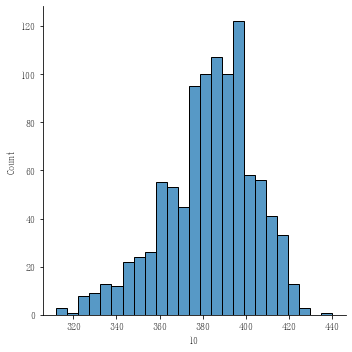

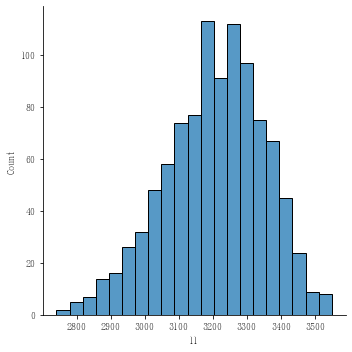

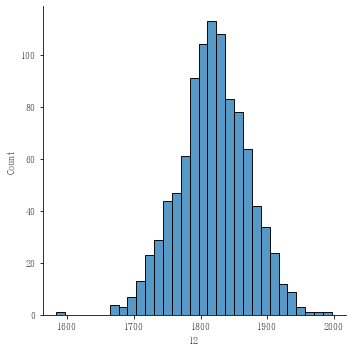

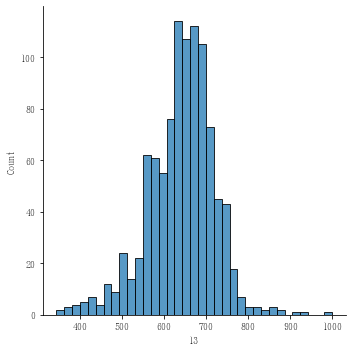

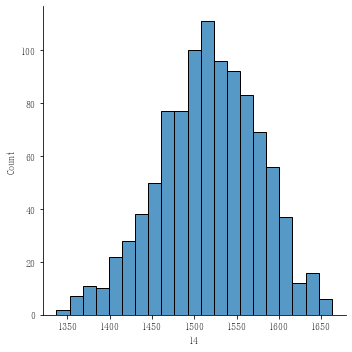

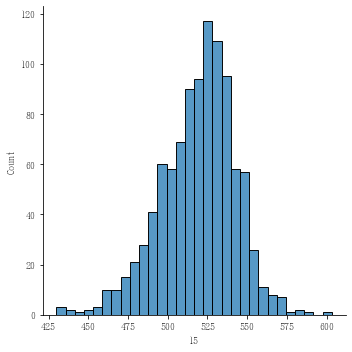

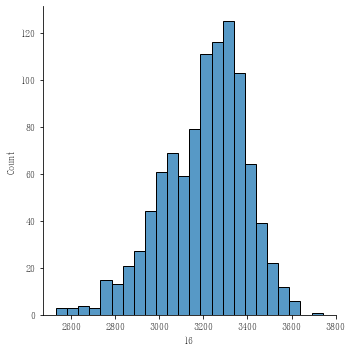

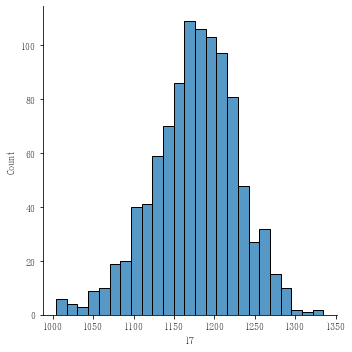

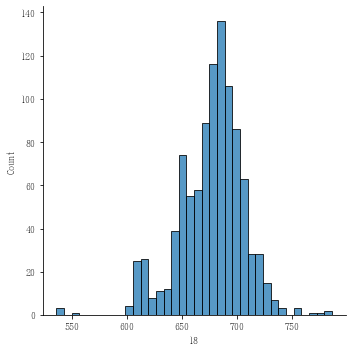

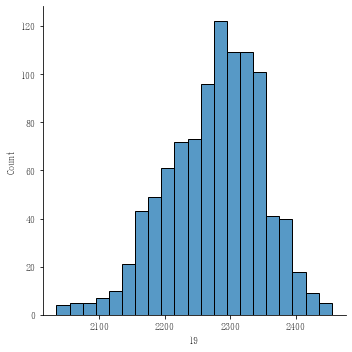

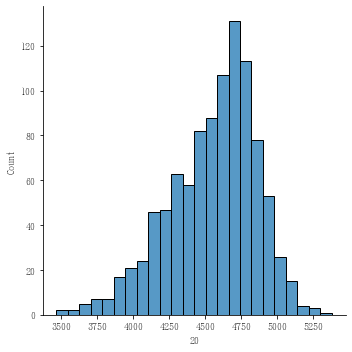

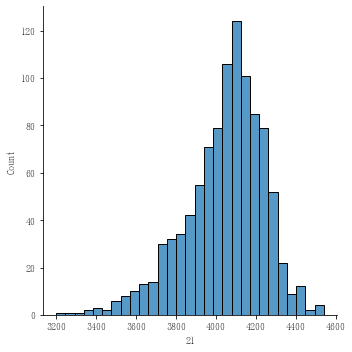

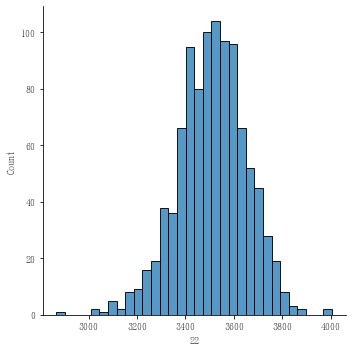

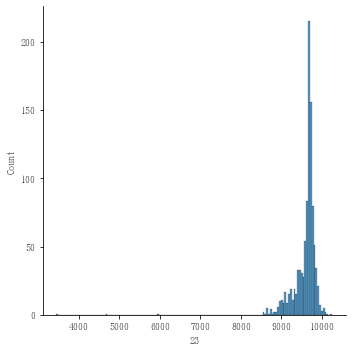

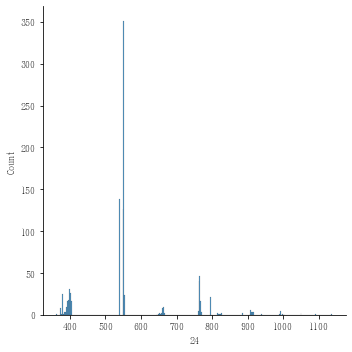

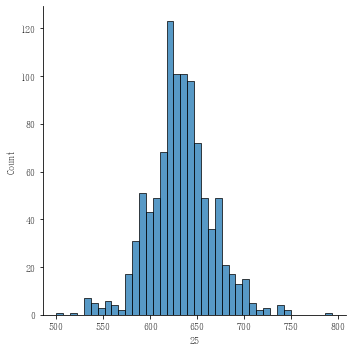

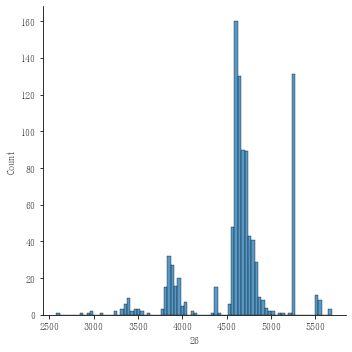

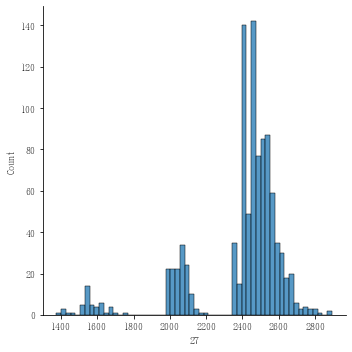

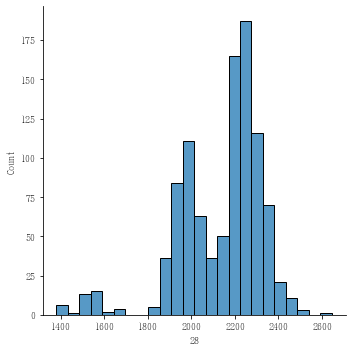

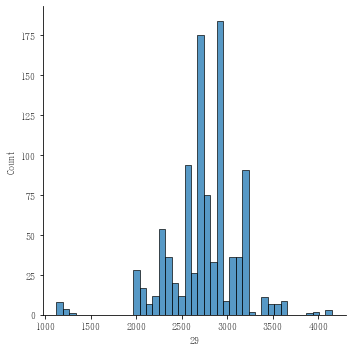

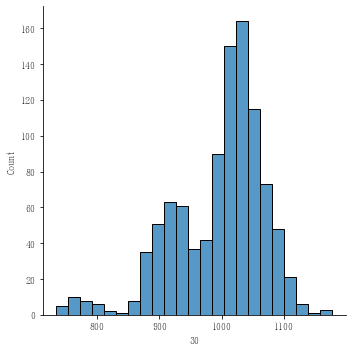

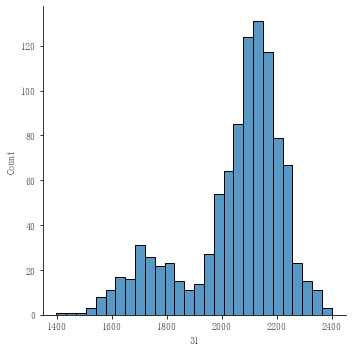

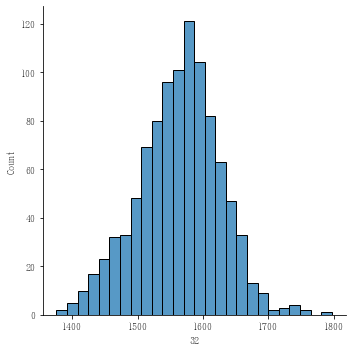

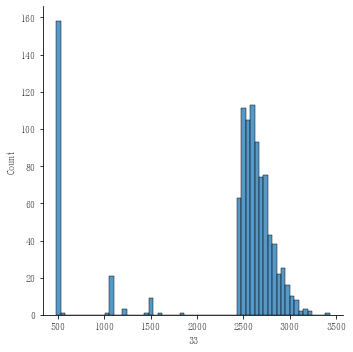

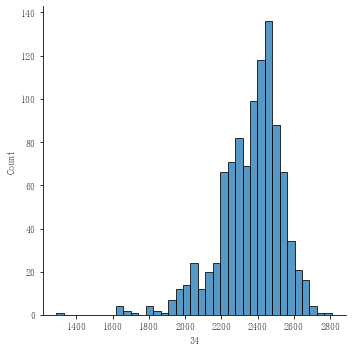

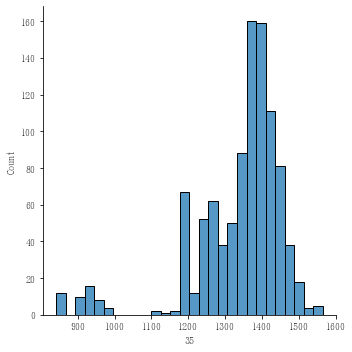

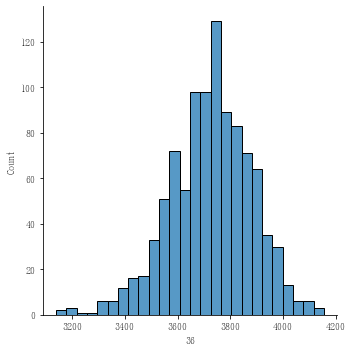

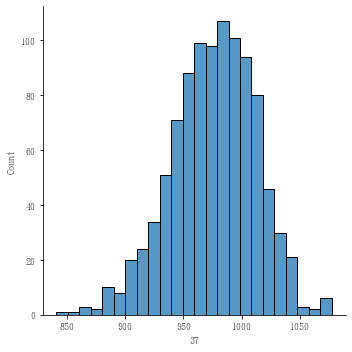

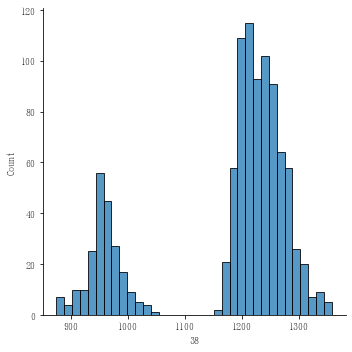

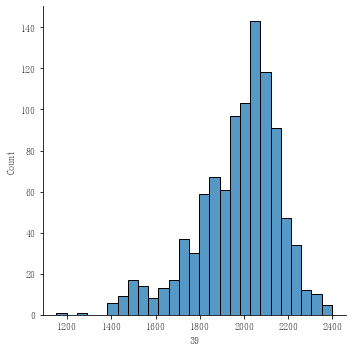

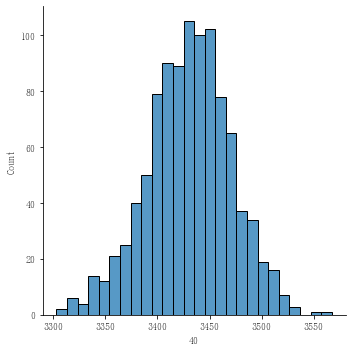

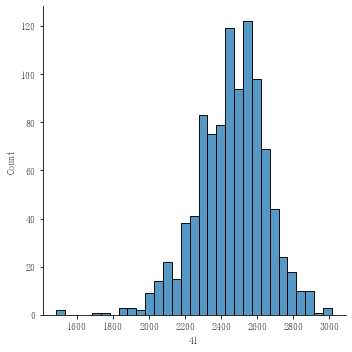

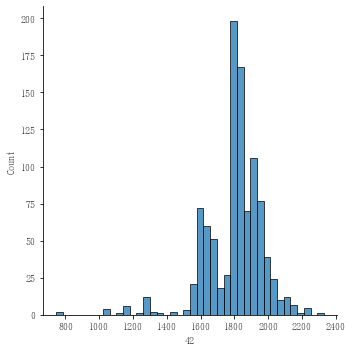

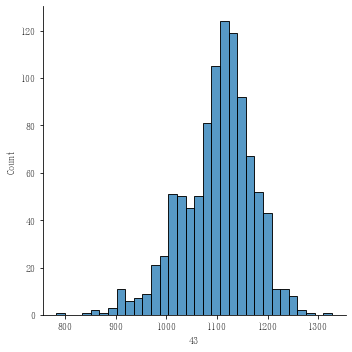

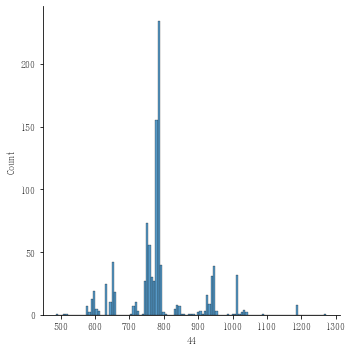

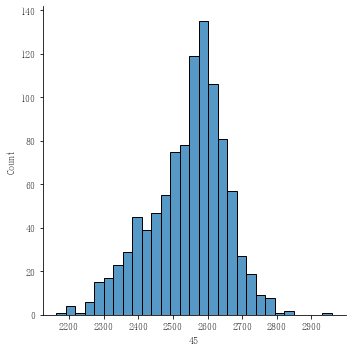

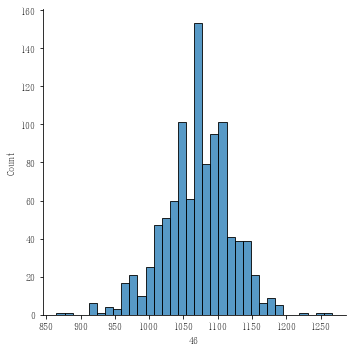

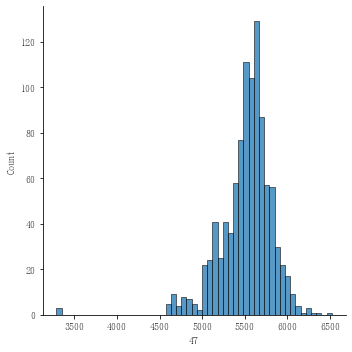

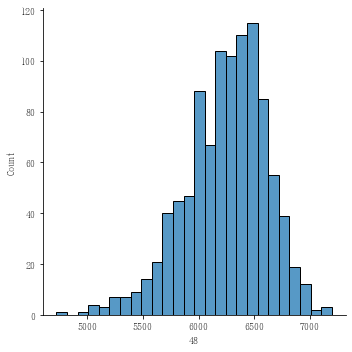

In [9]:
for i in range(49):
    sns.displot(proba50_dis.iloc[i,:])

In [10]:
#check #將比較標準定義在gray area外
#check #討論bootstrap分佈異常 #次數增大出現 多峰常態的現象 可以以26舉例來討論分析結果
#check #討論批次的異常是否集中在某處 #主要是有極端異常值 或是實驗組之變異量較大


#漏網之魚還是不少 #下界差異較大 #分佈左偏 #討論bootstrap信心水準
#視覺化gray area


#程式碼已寫好，估計要跑八小時 #將法一法二法三都做bootstrap

iteration 1000 times


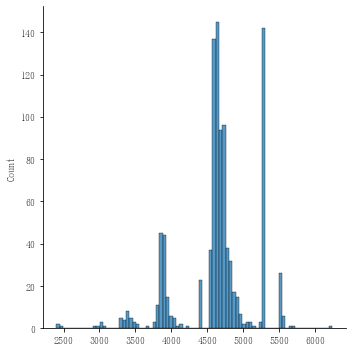

/Users/liu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


iteration 2000 times


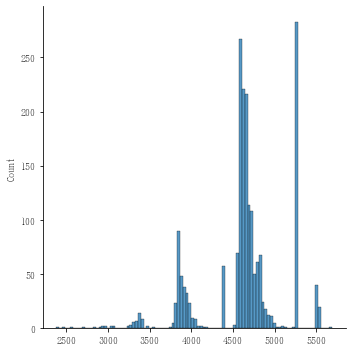

iteration 3000 times


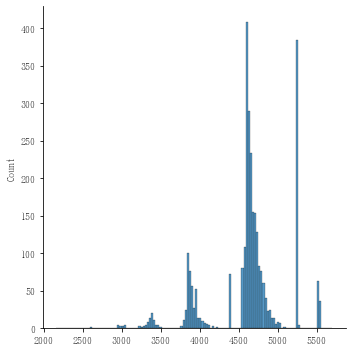

iteration 4000 times


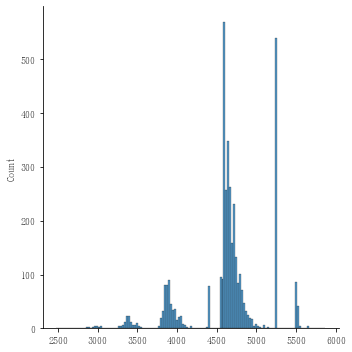

iteration 5000 times


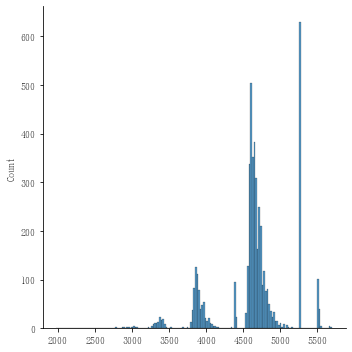

iteration 10000 times


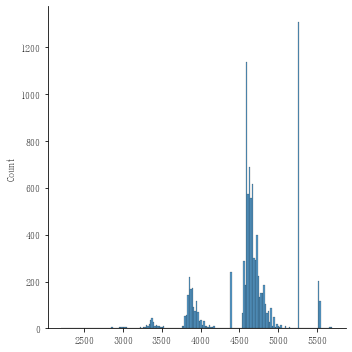

NameError: name 'end' is not defined

In [34]:
#test the suitable bootstrap times for mutation26
#choose it because of its variation

import time
start = time.time()
proba50_dis = []
#build dataframe for each mutation
#control
mutation_c = pd.DataFrame()
mutation_c['response'] = control.iloc[26,1:]
mutation_c['mutation'] = 0
mutation_c['level'] = 0
#mutated
mutation_m = pd.DataFrame()
mutation_m['response'] = merge.iloc[26,1:]
mutation_m['mutation'] = 1
mutation_m = pd.concat([mutation_m.reset_index(drop=True),pd.DataFrame(level,columns=['level'])],axis=1)
mutation = pd.concat([mutation_c.reset_index(drop=True),mutation_m],axis=0).reset_index(drop=True)
mutation['response'] = mutation['response'].astype('int')
#bootstrap
boot_test = [1000,2000,3000,4000,5000,10000]
for i in boot_test:
    bootstrap_proba50 = bootstrap(mutation,0.8,i) #this is a list of 1000 proba50
    print('iteration',i,'times')
    sns.displot(bootstrap_proba50)
    plt.show()
print('running time: ',end-start)

In [38]:
#method2的bootstrap版本，但使用大量迴圈，所需執行時間長，1000次重抽樣、1000cut，每一突變點需約10分鐘
def bootstrap_roc(data,sam_pro,repeat_times,cut_times):
    bootstrap_roc = []
    for i in range(repeat_times):
        sample = data.sample(frac=sam_pro)
        cut = np.linspace(min(sample['response']),max(sample['response']),cut_times)
        best_cut,SUM_best = find_roc_best(sample[sample.mutation==0],sample[sample.mutation==1],cut)
        bootstrap_roc.append(best_cut)
    return bootstrap_roc

In [39]:
#method3的bootstrap版本，耗時長、暫不考慮
def bootstrap_acc(data,sam_pro,repeat_times,cut_times):
    bootstrap_acc = []
    for i in range(repeat_times):
        sample = data.sample(frac=sam_pro)
        cut = np.linspace(min(sample['response']),max(sample['response']),cut_times)
        best_cut,accuracy_best = find_max_accu(sample[sample.mutation==0],sample[sample.mutation==1],cut)
        bootstrap_acc.append(best_cut)
    return bootstrap_acc

In [40]:
#fifth method
#conduct bootstrap method to find the distribution best roc_cut
start = time.time()
method_5 = pd.DataFrame(columns=['Index','Name','Lower','Upper','Gray rate','FN rate','Native','Mutated','Bignative','Smallmutation'])
roc_dis = []
for i in range(49):
    #build dataframe for each mutation
    #control
    mutation_c = pd.DataFrame()
    mutation_c['response'] = control.iloc[i,1:]
    mutation_c['mutation'] = 0
    mutation_c['level'] = 0
    #mutated
    mutation_m = pd.DataFrame()
    mutation_m['response'] = merge.iloc[i,1:]
    mutation_m['mutation'] = 1
    mutation_m = pd.concat([mutation_m.reset_index(drop=True),pd.DataFrame(level,columns=['level'])],axis=1)
    mutation = pd.concat([mutation_c.reset_index(drop=True),mutation_m],axis=0).reset_index(drop=True)
    mutation['response'] = mutation['response'].astype('int')
    #bootstrap
    bootstrap_roc = bootstrap_roc(mutation,0.8,1000,2000)
    roc_dis.append(bootstrap_roc)
    #calculating lower and upper bounds
    upper = max(bootstrap_roc)
    lower = min(bootstrap_roc)
    gray_num = count_num(mutation.iloc[:,0],lower,upper)
    native = count_num(mutation_c.iloc[:,0],lower,upper)
    mutated = count_num(mutation_m.iloc[:,0],lower,upper)
    big_native = count_large_native(mutation,upper)
    small_mutation = count_small_mutation(mutation,lower)
    #store into a df
    try:
        FN_rate = mutated/(native+mutated)
    except:
        FN_rate = 0
    method_5 = method_5.append({'Index':i,'Name':merge.iloc[i,0],'Lower':lower,'Upper':upper,
                                'Gray rate':gray_num/len(mutation),'FN rate':FN_rate,
                                'Native':native,'Mutated':mutated,'Bignative':big_native,'Smallmutation':small_mutation},
                                ignore_index=True)
    #print out the result
    print('the bounds of gray area of ','***',i,merge.iloc[i,0],'***',' is ','( {} , {} )'.format(lower,upper))
    print('the proportion of data in the gray area is ',gray_num/len(mutation))
    print('There are {} native and {} mutated in gray area: False Negative {}%'.format(native,mutated,FN_rate))
    print('***number of large_native is {}, number of small_mutation is {}'.format(big_native,
                                                                                       small_mutation))
#output the result as csv
method_5.to_csv('method_5.csv')
#how long does it take?
end = time.time()
print('running time: ',end-start)

KeyboardInterrupt: 

In [44]:
#fourth method #Second edition
#conduct bootstrap method to find the distribution proba50
#use the 5 and 95 percentile as lower and upper
start = time.time()
method_4_2 = pd.DataFrame(columns=['Index','Name','Lower','Upper','Gray rate','FN rate','Native','Mutated','Bignative','Smallmutation'])
proba50_dis = []
for i in range(49):
    #build dataframe for each mutation
    #control
    mutation_c = pd.DataFrame()
    mutation_c['response'] = control.iloc[i,1:]
    mutation_c['mutation'] = 0
    mutation_c['level'] = 0
    #mutated
    mutation_m = pd.DataFrame()
    mutation_m['response'] = merge.iloc[i,1:]
    mutation_m['mutation'] = 1
    mutation_m = pd.concat([mutation_m.reset_index(drop=True),pd.DataFrame(level,columns=['level'])],axis=1)
    mutation = pd.concat([mutation_c.reset_index(drop=True),mutation_m],axis=0).reset_index(drop=True)
    mutation['response'] = mutation['response'].astype('int')
    #bootstrap
    bootstrap_proba50 = bootstrap(mutation,0.8,1000) #this is a list of 1000 proba50
    proba50_dis.append(bootstrap_proba50)
    #calculating lower and upper bounds
    upper = np.percentile(bootstrap_proba50,95)
    lower = np.percentile(bootstrap_proba50,5)
    gray_num = count_num(mutation.iloc[:,0],lower,upper)
    native = count_num(mutation_c.iloc[:,0],lower,upper)
    mutated = count_num(mutation_m.iloc[:,0],lower,upper)
    big_native = count_large_native(mutation,upper)
    small_mutation = count_small_mutation(mutation,lower)
    #store into a df
    try:
        FN_rate = mutated/(native+mutated)
    except:
        FN_rate = 0
    method_4_2 = method_4_2.append({'Index':i,'Name':merge.iloc[i,0],'Lower':lower,'Upper':upper,
                                'Gray rate':gray_num/len(mutation),'FN rate':FN_rate,
                                'Native':native,'Mutated':mutated,'Bignative':big_native,'Smallmutation':small_mutation},
                                ignore_index=True)
    #print out the result
    print('the bounds of gray area of ','***',i,merge.iloc[i,0],'***',' is ','( {} , {} )'.format(lower,upper))
    print('the proportion of data in the gray area is ',gray_num/len(mutation))
    print('There are {} native and {} mutated in gray area: False Negative {}%'.format(native,mutated,FN_rate))
    print('***number of large_native is {}, number of small_mutation is {}'.format(big_native,
                                                                                       small_mutation))
#output the result as csv
method_4_2.to_csv('method_4_2.csv')
#how long does it take?
end = time.time()
print('running time: ',end-start)

the bounds of gray area of  *** 0 4-2 LCP-K-G12A-3 ***  is  ( 2226.5183482373523 , 3081.198809328516 )
the proportion of data in the gray area is  0.006426735218508998
There are 1 native and 4 mutated in gray area: False Negative 0.8%
***number of large_native is 2, number of small_mutation is 5
the bounds of gray area of  *** 1 86-2 K-G12D-dTCAP-1 ***  is  ( 2193.187572505782 , 2500.9430979374647 )
the proportion of data in the gray area is  0.006426735218508998
There are 3 native and 2 mutated in gray area: False Negative 0.4%
***number of large_native is 6, number of small_mutation is 15
the bounds of gray area of  *** 2 87-2 K-G12V-dTCAP-1 ***  is  ( 1526.2124241291276 , 2000.6322808286886 )
the proportion of data in the gray area is  0.008997429305912597
There are 2 native and 5 mutated in gray area: False Negative 0.7142857142857143%
***number of large_native is 3, number of small_mutation is 5
the bounds of gray area of  *** 3 4-7 LCP-K-G12C-3 ***  is  ( 1379.0559386206871 , 211

the bounds of gray area of  *** 28 59-6 LCP-E-12370-6 ***  is  ( 1896.6585815124056 , 2379.720138841281 )
the proportion of data in the gray area is  0.0
There are 0 native and 0 mutated in gray area: False Negative 0%
***number of large_native is 2, number of small_mutation is 7


/Users/liu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the bounds of gray area of  *** 29 EGFR Capture 57-15 12384 ***  is  ( 2210.1308369527496 , 3223.739771004133 )
the proportion of data in the gray area is  0.005141388174807198
There are 2 native and 2 mutated in gray area: False Negative 0.5%
***number of large_native is 1, number of small_mutation is 3
the bounds of gray area of  *** 30 62-1 LCP-E-6254/12369/23571-1 ***  is  ( 876.7577098302847 , 1088.1495578438191 )
the proportion of data in the gray area is  0.0012853470437017994
There are 0 native and 1 mutated in gray area: False Negative 1.0%
***number of large_native is 2, number of small_mutation is 22
the bounds of gray area of  *** 31 3-2 EGFR-6223-dTCAP-2 ***  is  ( 1630.7680821482863 , 2259.683724830944 )
the proportion of data in the gray area is  0.015424164524421594
There are 2 native and 10 mutated in gray area: False Negative 0.8333333333333334%
***number of large_native is 5, number of small_mutation is 8
the bounds of gray area of  *** 32 EGFR Capture 57-23 6225 ***

/Users/liu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the bounds of gray area of  *** 33 EGFR Capture 57-28 12382 ***  is  ( 499.0106004483892 , 2941.7980163370926 )
the proportion of data in the gray area is  0.002570694087403599
There are 0 native and 2 mutated in gray area: False Negative 1.0%
***number of large_native is 1, number of small_mutation is 2
the bounds of gray area of  *** 34 70-4 LCP-E-Del24-m2-01 ***  is  ( 2037.1767028761285 , 2579.116916789629 )
the proportion of data in the gray area is  0.008997429305912597
There are 1 native and 6 mutated in gray area: False Negative 0.8571428571428571%
***number of large_native is 3, number of small_mutation is 2
the bounds of gray area of  *** 35 EGFR Capture 57-17 12678 ***  is  ( 1181.3203846461747 , 1468.4756648123393 )
the proportion of data in the gray area is  0.002570694087403599
There are 0 native and 2 mutated in gray area: False Negative 1.0%
***number of large_native is 2, number of small_mutation is 2
the bounds of gray area of  *** 36 46-3 LCP-E-6240-mis-13 ***  is  (

plot of mutation: 0 - 4-2 LCP-K-G12A-3


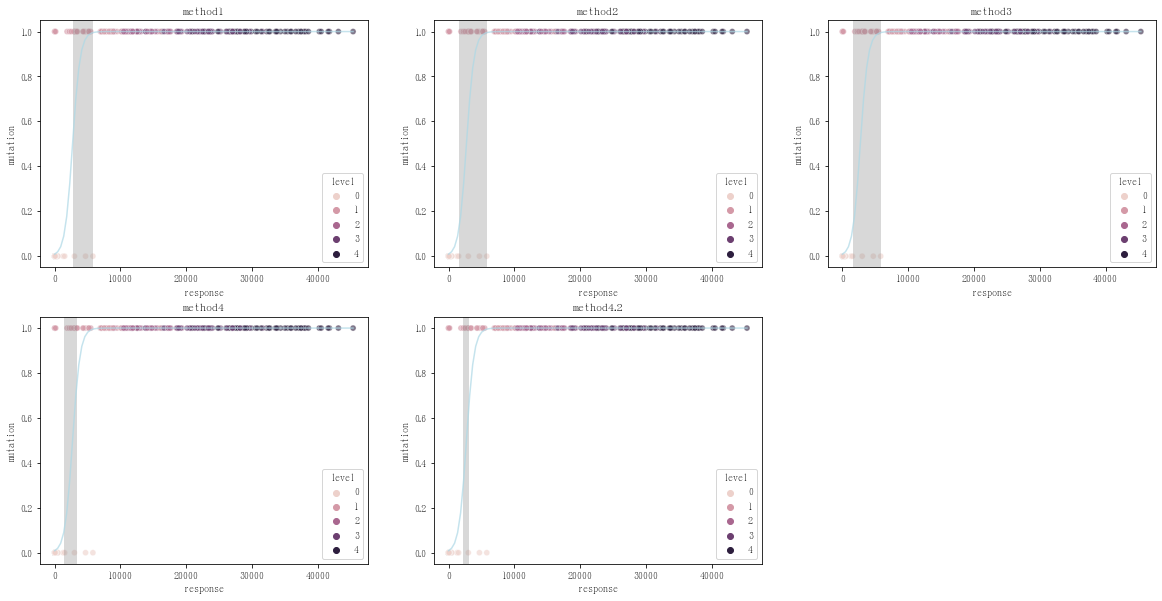

plot of mutation: 9 - 88-3 K-Q61HT-dTCAP-1


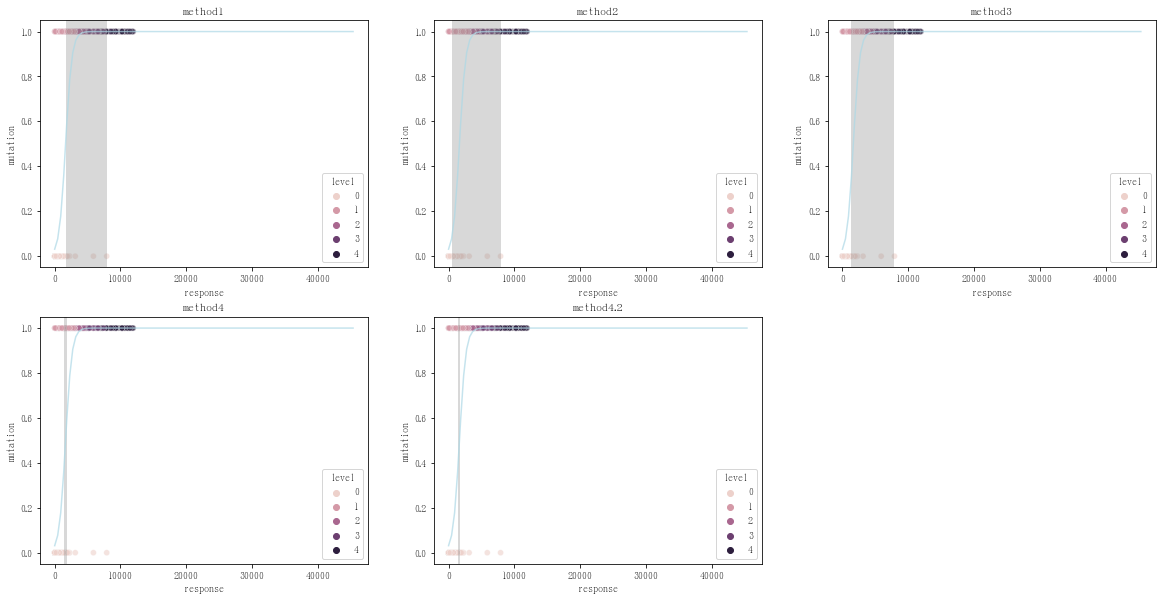

plot of mutation: 12 - 7-11 LCP-K-Q61R-12


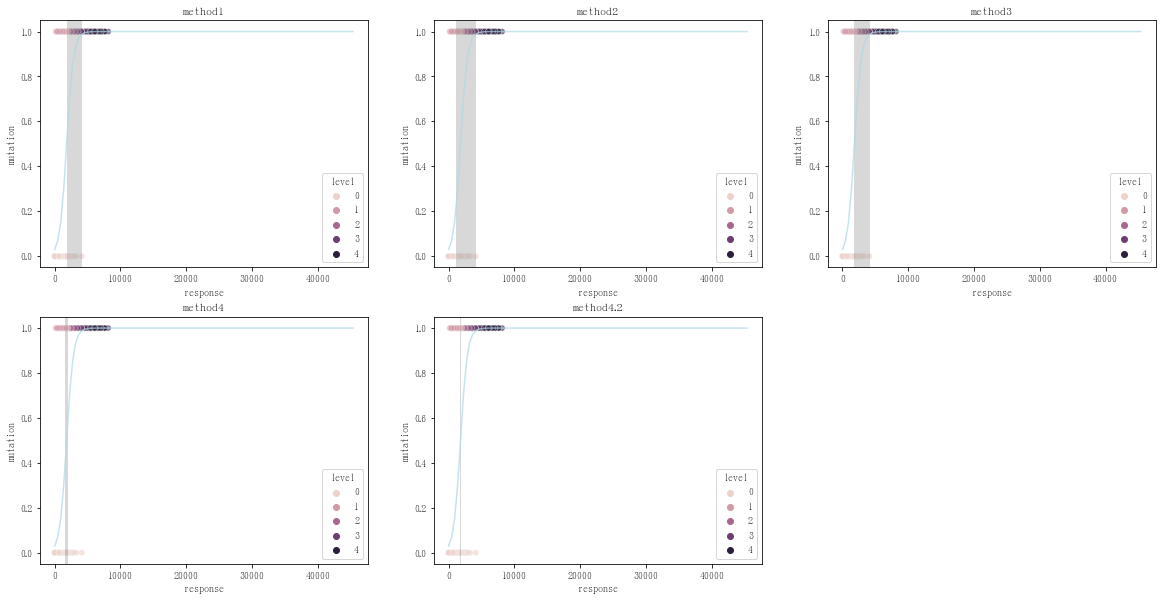

plot of mutation: 31 - 3-2 EGFR-6223-dTCAP-2


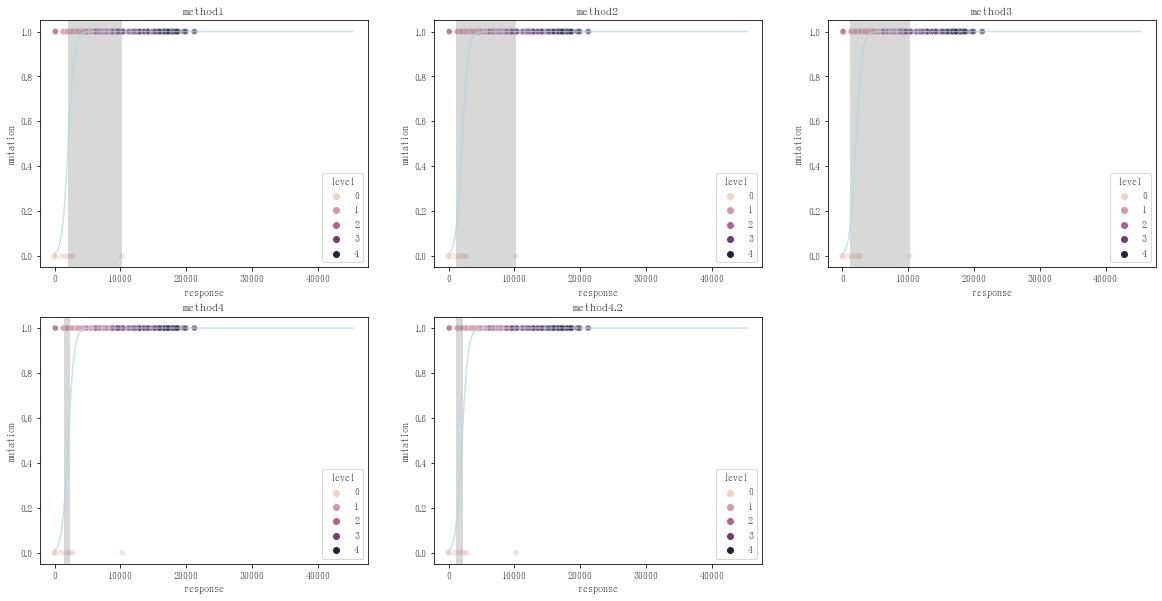

plot of mutation: 43 - 59-1 LCP-E-6224-12


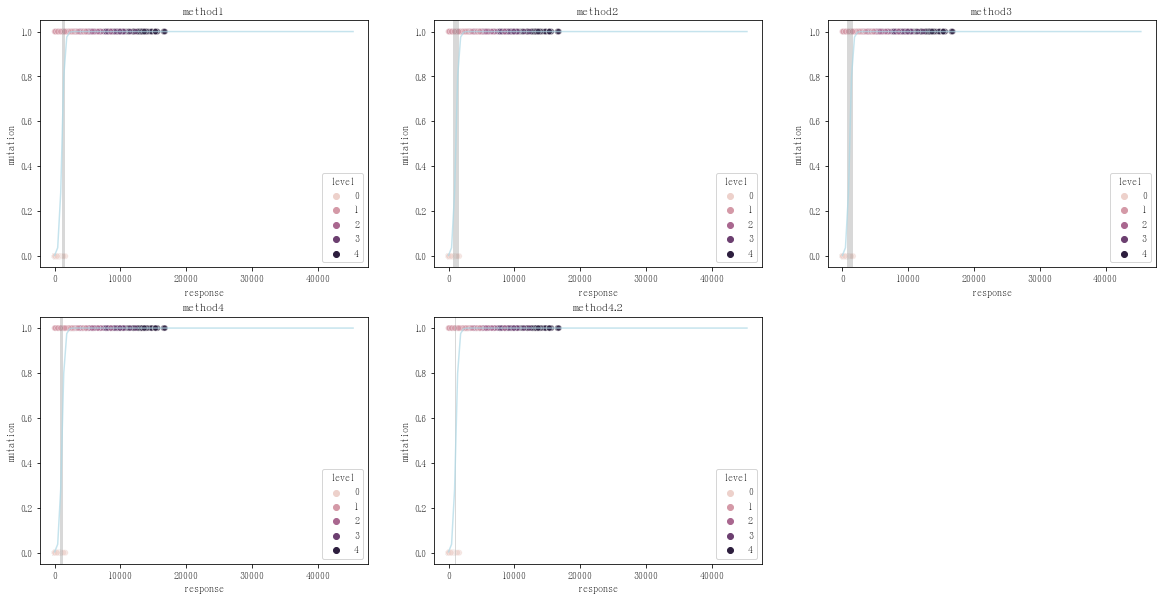

plot of mutation: 44 - 10-7 LCP-E-6213-1


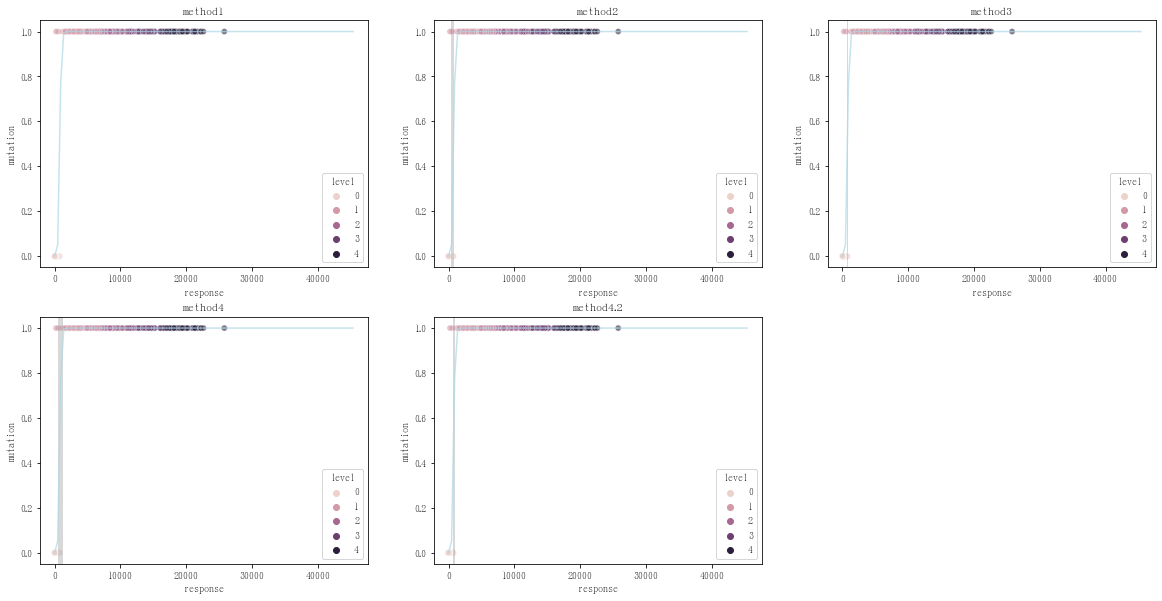

running time:  15.067196130752563


In [113]:
#visualize all 5 methods on the following index(reason listed in the excel file)
vis_ind = [0,9,12,31,43,44]
import time
start = time.time()
boundaries = pd.read_excel('/Users/liu/Desktop/合作社專案三_lungcancer/資料彙整.xlsx',sheet_name='visualized mutation')
plt.rcParams["figure.figsize"] = (20,10)
for i,j in enumerate(vis_ind):
    mutation_c = pd.DataFrame()
    mutation_c['response'] = control.iloc[j,1:]
    mutation_c['mutation'] = 0
    mutation_c['level'] = 0
    mutation_m = pd.DataFrame()
    mutation_m['response'] = merge.iloc[j,1:]
    mutation_m['mutation'] = 1
    mutation_m = pd.concat([mutation_m.reset_index(drop=True),pd.DataFrame(level,columns=['level'])],axis=1)
    mutation = pd.concat([mutation_c.reset_index(drop=True),mutation_m],axis=0).reset_index(drop=True)
    mutation['response'] = mutation['response'].astype('int')
    clf = LogisticRegression()
    X = mutation['response'].values.reshape(-1,1)
    Y = mutation['mutation'].values.reshape(-1,1)
    clf.fit(X,np.ravel(Y.astype(int)))
    print('plot of mutation:',j,'-',merge.iloc[j,0])
    for k in range(1,6):
        lower = float(boundaries.iloc[i+1,k+1])
        upper = float(boundaries.iloc[i+1,k+6])
        plt.subplot(2, 3, k)
        sns.scatterplot(data=mutation,x='response',y='mutation',hue='level',alpha=0.6).set_title(label=boundaries.iloc[0,k+1])
        plt.plot(curve,clf.predict_proba(curve)[:,1],alpha=0.7,color='lightblue')
        plt.axvspan(lower, upper, facecolor='gray', alpha=0.3)
        
    plt.show()
end = time.time()
print('running time: ',end-start)